# **Import Library:** 분석에 사용할 모듈 설치

[![Open in Colab](http://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/thekimk/All-About-Time-Series-Analysis/blob/main/Practice3-8_StatisticalLearning_TimeSeries_NeuralProphet_KK.ipynb)

---

> **"통계추론, 기계학습 및 딥러닝의 흐름에 `시간패턴`을 반영하려 진화"**
>
> **"`지도학습(예측 분류), 비지도학습` 문제에 모두 활용되는 필수 알고리즘"** 
>
> **"`미래 예측을 포함한 추천 서비스와 같은 비즈니스`에 활용중"** 

<center><img src='Image/Expert/TS_Evolution.png' width='900'></center>

<!-- <center><img src='Image/Expert/Performance_Explanability_TimeSeries.png' width='600'></center> -->

In [1]:
!pip install --upgrade pip
!python -m pip install --user --upgrade pip
# # Basic Install
# !pip install --user neuralprophet
# # Advanced Install
# !pip install --user neuralprophet[live]
# # at Anaconda Prompt
# git clone https://github.com/ourownstory/neural_prophet
# cd neural_prophet
# pip install .[live]

In [2]:
# Auto reload of library
%reload_ext autoreload
%autoreload 2
from module_timeseries import *
from neuralprophet import NeuralProphet

# **Advanced Algorithm:** Neural Prophet

> **"페이스북이 공개한 `시계열 예측 라이브러리`[(Sean J et al., 2017)](https://peerj.com/preprints/3190.pdf)"**
>
> - `가법모형`을 기반으로 통계추론 알고리즘을 `발전`[(Quick Guide)](https://facebook.github.io/prophet/docs/quick_start.html)
>
> **"페이스북이 스탠포드와 모나쉬 대학 연구원들과 협력하여 새로운 `시계열 예측 라이브러리`[(Oskar et al., 2021)](https://arxiv.org/pdf/2111.15397.pdf) 공개되었으며 기존 `Prophet의 확장판`으로 심플하게 사용"**
>
> - `PyTorch`로 사용 구축되고 `AR-Net`과 같은 정교한 딥러닝 알고리즘도 포함시킴[(Quick Guide)](https://neuralprophet.com/quickstart.html)

---

- **`Neural Prophet` 개발 배경 또는 사용을 위한 기본 환경추천:**

> - `완전자동화 기술`은 상황에 맞게 `튜닝하기 어렵고` `경험적 지식 반영이 어려움`
> - `도메인 기반 전통적 분석가들`은 도메인 지식만 풍부한 편이며 `데이터기반 분석을 쉽게 다루지 못함`
> - `비전문가`가 `경험적 특성을 분석에 반영`할 수 있도록 필요한 `부분 자동화`
> - 정확도 및 예측이 좋으며 `추세, 주기적특성, 이벤트, 휴가, 상한선, 이상치 등`의 상황들을 자유롭게 반영 가능

|  	| **ARIMA** 	| **Neural Prophet** 	|
|:---:	|:---:	|:---:	|
| **파라미터** 	| 데이터 지식과 통계적 지식 필요 	| `직관적`으로 반영 및 수정 가능 	|
| **유연성** 	| 주기적 특성 획일적 	| `다양한 주기적 특성` 모델링 가능 	|
| **정상성** 	| 정상성 반영 이해 필수 	| `불필요` 	|
| **결측치** 	| 처리 필요 	| 처리 `불필요` 	|

## 데이터 전처리

### **데이터1:** 공유경제 수요데이터

In [3]:
# 데이터 로딩
location = os.path.join('.', 'Data', 'BikeSharingDemand', 'Bike_Sharing_Demand_Full.csv')
df_all = pd.read_csv(location)

# 데이터 전처리
df_fe = feature_engineering(df_all)

# 데이터 분리
Y_colname = ['count']
X_remove = ['datetime', 'DateTime', 'temp_group', 'casual', 'registered']
X_colname = [x for x in df_fe.columns if x not in Y_colname+X_remove]
X_train, X_test, Y_train, Y_test = datasplit_ts(df_fe, Y_colname, X_colname, '2012-07-01')

# 데이터 전처리(현실성)
### Reality ###
target = ['count_trend', 'count_seasonal', 'count_Day', 'count_Week', 'count_diff']
X_train_R, X_test_R = feature_engineering_year_duplicated(X_train, X_test, target)
target = ['count_lag1', 'count_lag2']
X_test_R = feature_engineering_lag_modified(Y_test, X_test_R, target)
###############
### Scaling ###
X_train_RS, X_test_RS = feature_engineering_scaling(preprocessing.Normalizer(), 
                                                    X_train_R, X_test_R)
###############
### Multicollinearity ###
print('Number_of_Total_X: ', len(X_train_RS.columns))
X_colname_vif = feature_engineering_XbyVIF(X_train_RS, 12)
print('Number_of_Selected_X: ', len(X_colname_vif))
X_train_RSM, X_test_RSM = X_train_RS[X_colname_vif].copy(), X_test_RS[X_colname_vif].copy()
#########################

Train_size: (13128, 28) Test_size: (4416, 28)
X_train: (13128, 24) Y_train: (13128, 1)
X_test: (4416, 24) Y_test: (4416, 1)
Number_of_Total_X:  24
Number_of_Selected_X:  12


### **데이터2:** 도시의 이산화질소 배출량

In [4]:
# # 데이터 로딩
# url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00501/PRSA2017_Data_20130301-20170228.zip"
# r = requests.get(url, allow_redirects=True)
# open('data.zip', 'wb').write(r.content)
# from zipfile import ZipFile
# zip_file = ZipFile('data.zip')
# files = zip_file.infolist()
# df = pd.read_csv(zip_file.open(files[8].filename))

# # 데이터 분리
# df['ds'] = pd.to_datetime(df.rename(columns={'Date':'Day'})[['hour','day','month','year']])
# df = df.rename(columns={'NO2':'y'})
# Y_colname = ['y']
# X_colname = [x for x in df.columns if x not in Y_colname][:-1]
# X_train_RSM, X_test_RSM, Y_train, Y_test = datasplit_ts(df.iloc[-10500:,:].set_index('ds'), 
#                                                         Y_colname, X_colname, '2017-01-01')
# Y_train = Y_train.fillna(method='ffill')
# Y_test = Y_test.fillna(method='ffill')

## 기본 사용법

| **반영 대상** 	| **파라미터명** 	| **의미** 	|
|:---:	|:---	|:---	|
| **추세** 	| growth 	| `off, linear, discontinuous` 	|
|  	| changepoints 	| CP가 발생하는 시점들의 list [`2012-01-01`] 	|
|  	| n_changepoints 	| CP의 잠재적인 갯수 	|
|  	| changepoints_range 	| CP의 기존 데이터 수 대비 최대 비율 	|
|  	| trend_reg 	| CP의 변화 자유도 정도(1미만은 빠르게 커지면 제한적) 	|
|  	| trend_reg_threshold 	| CP 추세를 부드럽게 세팅 	|
| **계절성** 	| seasonality_mode 	| `additive, multiplicative` 	|
|  	| seasonality_reg 	| 계절성 변화 자유도 정도(1미만은 넓은계절성 커지면 Dampen)  	|
|  	| yearly_seasonality 	| 연계절성 	|
|  	| weekly_seasonality 	| 주계절성 	|
|  	| daily_seasonality 	| 일계절성 	|
| **결측치처리** 	| impute_missing 	| 데이터 결측값을 자동으로 대체 	|
|  	| impute_linear 	| 선형방식으로 결측값 대체 최대 개수 	|
|  	| impute_rolling 	| Rolling Window방식으로 결측값 대체 최대 개수 	|
|  	| drop_missing 	| 데이터 결측값을 자동으로 제거 	|
| **AR-Net** 	| n_lags 	| AR-Net 차수 	|
|  	| num_hidden_layers 	| AR-Net이 포함하는 히든네트워크 개수 	|
|  	| d_hidden 	| 히든네트워크의 차원 	|
|  	| ar_reg 	| 0이아닌 계수 개수(1미만은 많이 커지면 적게) 	|
| **모델링설정** 	| n_forecasts 	| 미래 예측 시점 	|
|  	| normalize 	| `soft(default), soft1, off, minmax, standardize`  	|
|  	| learning_rate 	| 학습 업데이트 속도 	|
|  	| epochs 	| 전체 데이터가 학습된 횟수 	|
|  	| batch_size 	| 전체 데이터를 나눌 서브 데이터 크기 	|
|  	| loss_func 	| 비용함수 	|
|  	| optimizer 	| 비용함수 최적화 알고리즘 	|

INFO - (NP.df_utils._infer_frequency) - Major frequency H corresponds to 99.992% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as H
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling yearly seasonality. Run NeuralProphet with yearly_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 64
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 96
WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (206) is too small than the required number for the learning rate finder (253). The results might not be optimal.


Finding best initial lr:   0%|          | 0/253 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

WARNING - (NP.plotting.log_warning_deprecation_plotly) - DeprecationWarning: default plotting_backend will be changed to plotly in a future version. Switch to plotly by calling `m.set_plotting_backend('plotly')`.


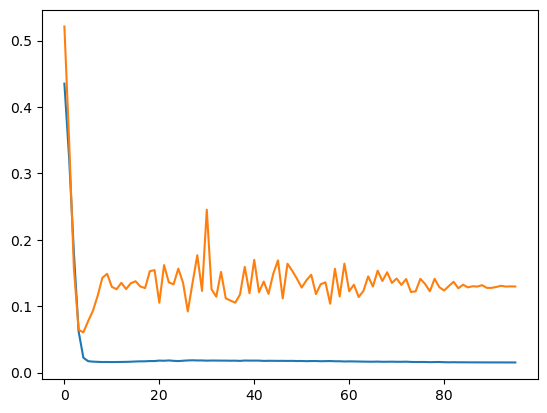

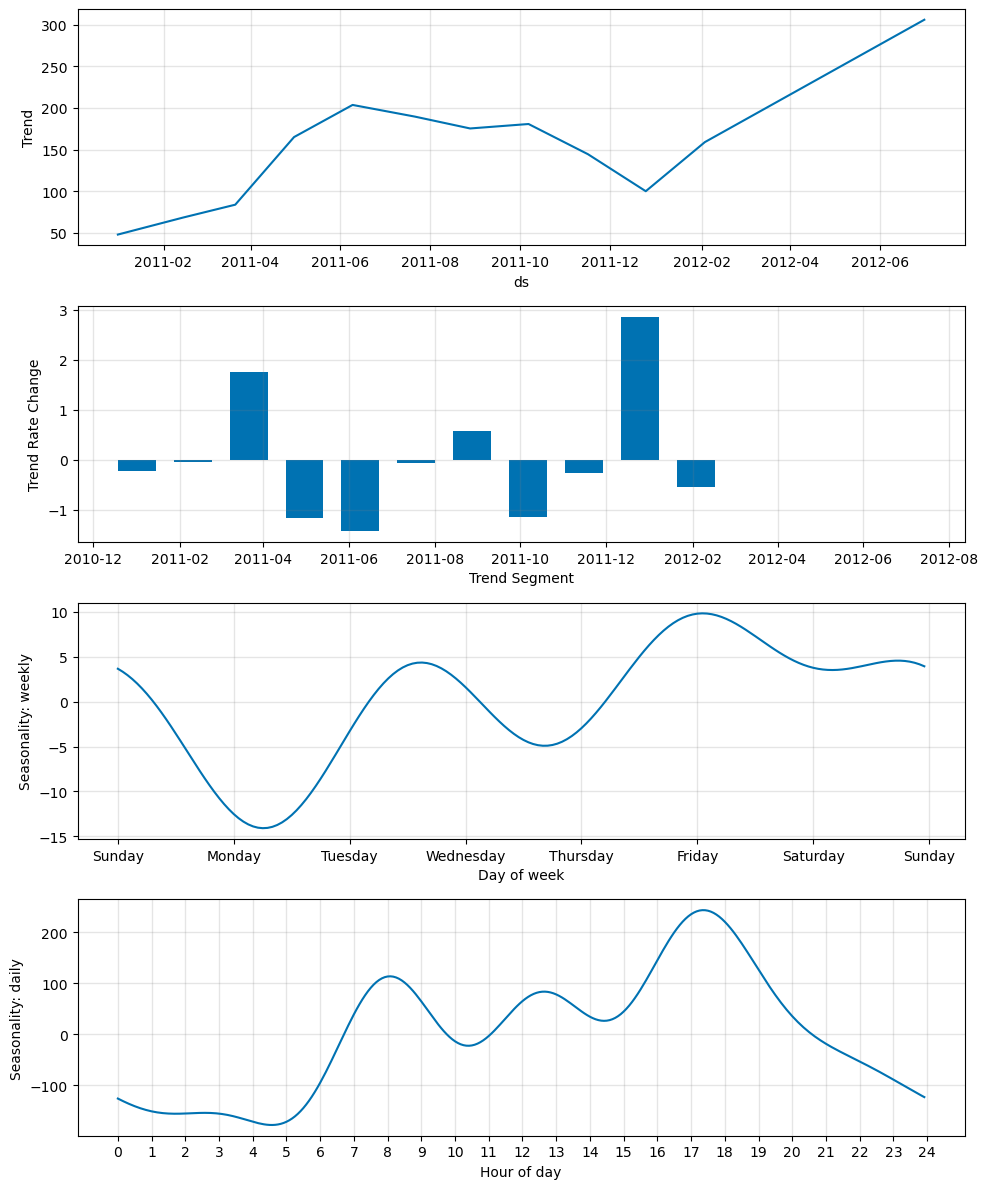

WARNING - (NP.forecaster.predict) - Raw forecasts are incompatible with plotting utilities
INFO - (NP.df_utils._infer_frequency) - Major frequency H corresponds to 99.992% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - H
INFO - (NP.df_utils._infer_frequency) - Major frequency H corresponds to 99.992% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - H


Predicting: 206it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (NP.forecaster.predict) - Raw forecasts are incompatible with plotting utilities
INFO - (NP.df_utils._infer_frequency) - Major frequency H corresponds to 99.977% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - H
INFO - (NP.df_utils._infer_frequency) - Major frequency H corresponds to 99.977% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - H


Predicting: 206it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


MAE       MSE  MAPE
Train  70.35  9,340.23  3.05
Test  192.81 49,960.89  7.12

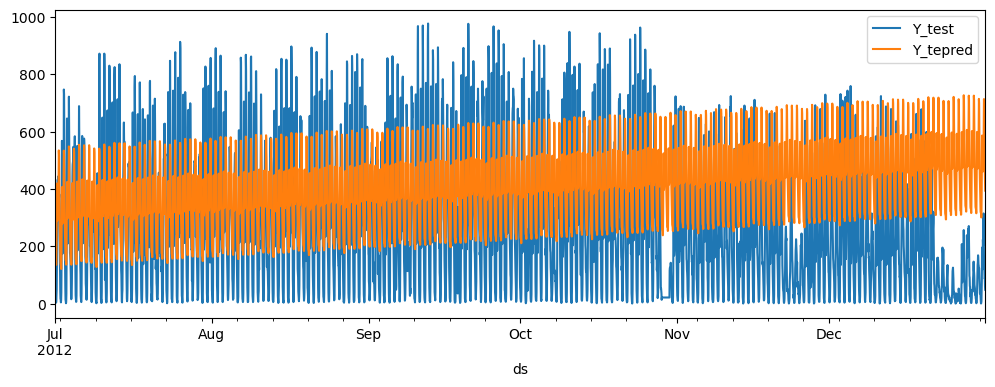

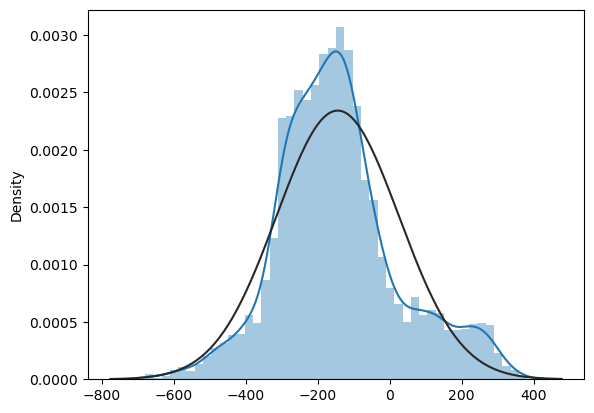

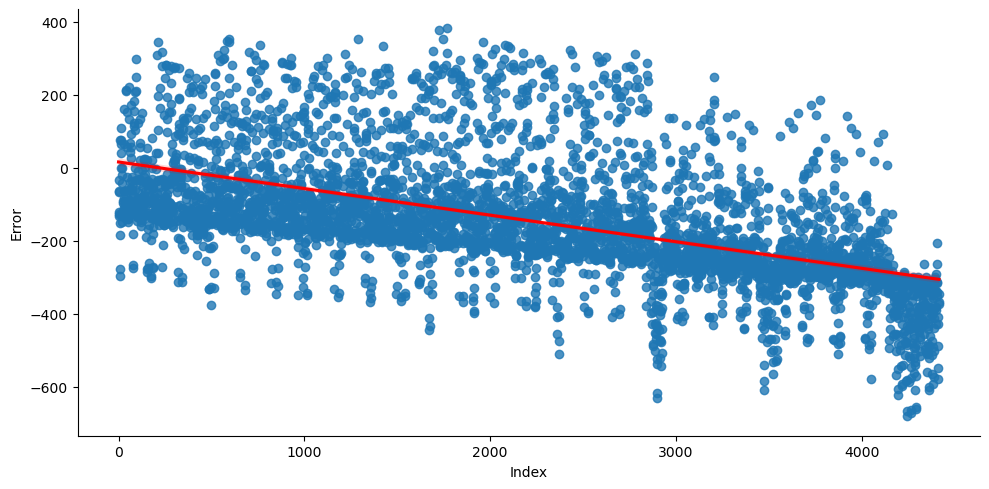

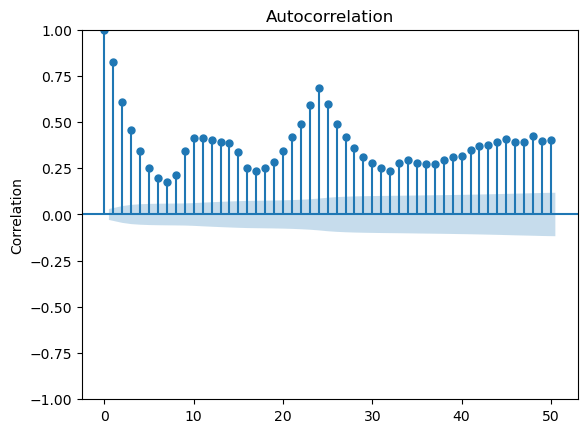

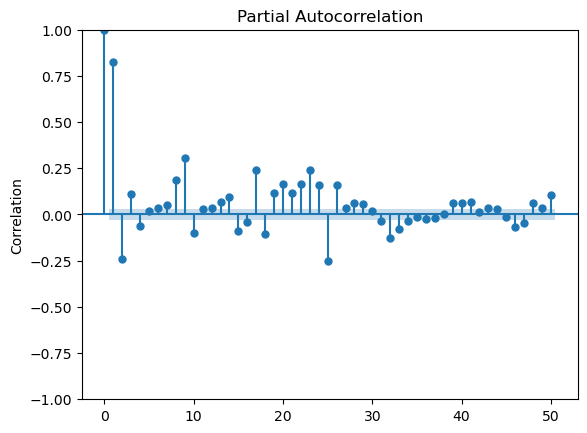

WARNING - (py.warnings._showwarnmsg) - C:\Users\KK\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(

WARNING - (py.warnings._showwarnmsg) - C:\Users\KK\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(



Normality Heteroscedasticity  Autocorr(lag10)  \
Test Statistics           0.97               0.98         8,199.07   
p-value                   0.00               0.62             0.00   
Alternative                NaN          two-sided              NaN   
Used Lag                   NaN                NaN              NaN   
Critical Value(1%)         NaN                NaN              NaN   
Critical Value(5%)         NaN                NaN              NaN   
Critical Value(10%)        NaN                NaN              NaN   

                     Autocorr(lag50)  Stationarity_ADF  Stationarity_KPSS  
Test Statistics            33,818.84             -2.75               9.94  
p-value                         0.00              0.07               0.01  
Alternative                      NaN               NaN                NaN  
Used Lag                         NaN             31.00              32.00  
Critical Value(1%)               NaN             -3.43               0.74  
Critical Value(5%)               NaN             -2.86               0.46  
Critical Value(10%)              NaN             -2.57               0.35

In [5]:
# NeuralProphet 데이터형식으로 변환
Y_train_neupro = Y_train.reset_index()
Y_train_neupro.columns = ['ds', 'y']
Y_test_neupro = Y_test.reset_index()
Y_test_neupro.columns = ['ds', 'y']

# 모델링
model_neupro = NeuralProphet()
model_neupro.fit(Y_train_neupro, validation_df=Y_test_neupro,
                 freq='auto', progress='plot')
model_neupro.plot_parameters()
plt.show()
Y_trpred = model_neupro.predict(Y_train_neupro, decompose=True, raw=True)
Y_trpred.set_index('ds', inplace=True)
Y_tepred = model_neupro.predict(Y_test_neupro, decompose=True, raw=True)
Y_tepred.set_index('ds', inplace=True)

# 검증
Score_neupro = evaluation_reg_trte(Y_train, Y_trpred.iloc[:,:1], Y_test, Y_tepred.iloc[:,:1])
display(Score_neupro)

# 결과 시각화
ax = Y_test.plot(figsize=(12,4))
pd.DataFrame(Y_tepred[['step0']]).plot(label='Time Sequence Prediction', ax=ax)
plt.legend(['Y_test', 'Y_tepred'])
plt.show()

# 에러 분석
Resid_te = Y_test - Y_tepred[['step0']].values
Resid_te.columns = ['Error']
Error_te = error_analysis_timeseries(X_test, Y_tepred, Resid_te, graph_on=True)
display(Error_te)

## 추세 처리

| **반영 대상** 	| **파라미터명** 	| **의미** 	|
|:---:	|:---	|:---	|
| **추세** 	| growth 	| `off, linear, discontinuous` 	|
|  	| changepoints 	| CP가 발생하는 시점들의 list [`2012-01-01`] 	|
|  	| n_changepoints 	| CP의 잠재적인 갯수 	|
|  	| changepoints_range 	| CP의 기존 데이터 수 대비 최대 비율 	|
|  	| trend_reg 	| CP의 변화 자유도 정도(1미만은 빠르게 커지면 제한적) 	|
|  	| trend_reg_threshold 	| CP 추세를 부드럽게 세팅 	|


In [6]:
import matplotlib
import matplotlib.pyplot as plt
plt.ioff()    # 시각화가 호출될때마다 그림생성 차단 (한꺼번에 시각화시 필요)
matplotlib.is_interactive()

False

INFO - (NP.config.__post_init__) - Note: Trend changepoint regularization is experimental.
INFO - (NP.df_utils._infer_frequency) - Major frequency H corresponds to 99.992% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as H
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling yearly seasonality. Run NeuralProphet with yearly_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 64
WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (206) is too small than the required number for the learning rate finder (253). The results might not be optimal.


Finding best initial lr:   0%|          | 0/253 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

WARNING - (NP.plotting.log_warning_deprecation_plotly) - DeprecationWarning: default plotting_backend will be changed to plotly in a future version. Switch to plotly by calling `m.set_plotting_backend('plotly')`.


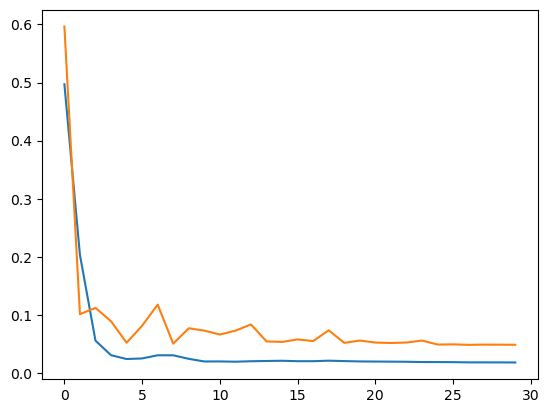

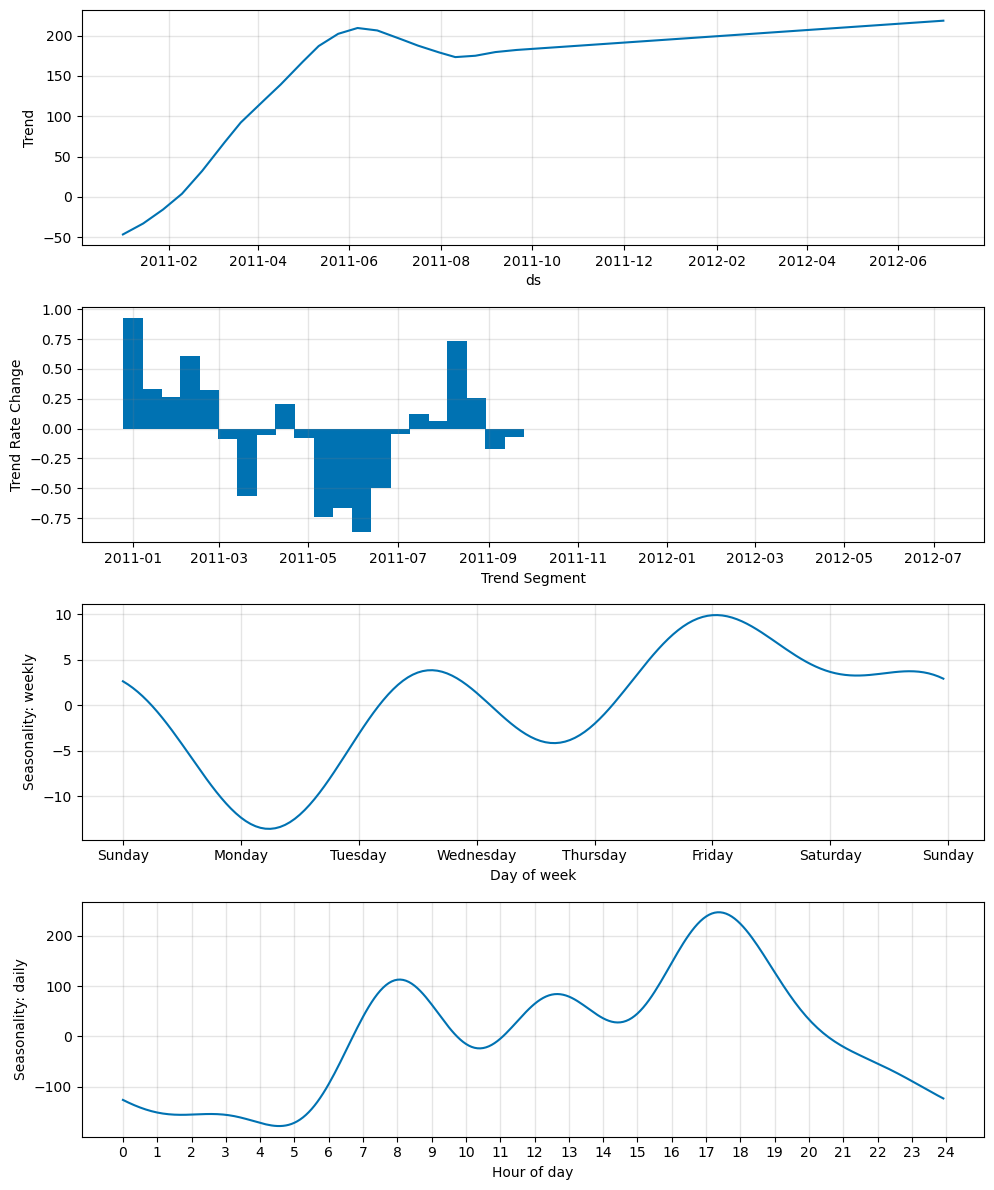

WARNING - (NP.forecaster.predict) - Raw forecasts are incompatible with plotting utilities
INFO - (NP.df_utils._infer_frequency) - Major frequency H corresponds to 99.992% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - H
INFO - (NP.df_utils._infer_frequency) - Major frequency H corresponds to 99.992% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - H


Predicting: 206it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (NP.forecaster.predict) - Raw forecasts are incompatible with plotting utilities
INFO - (NP.df_utils._infer_frequency) - Major frequency H corresponds to 99.977% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - H
INFO - (NP.df_utils._infer_frequency) - Major frequency H corresponds to 99.977% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - H


Predicting: 206it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


MAE       MSE  MAPE
Train  76.49 11,220.81  3.75
Test  107.30 23,045.79  2.13

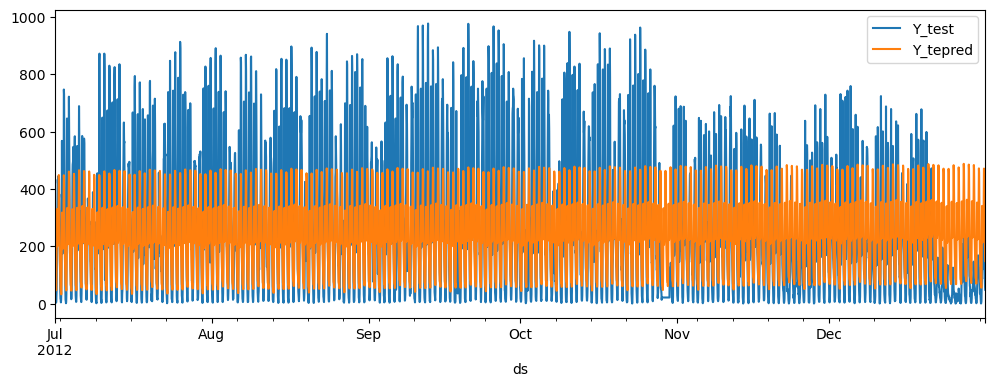

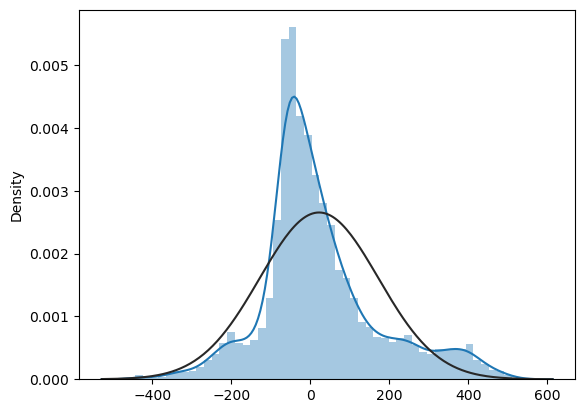

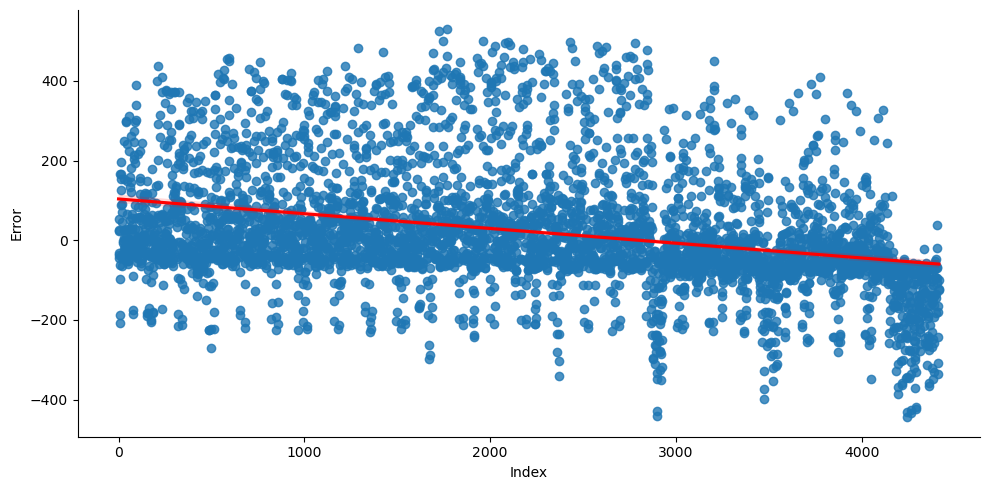

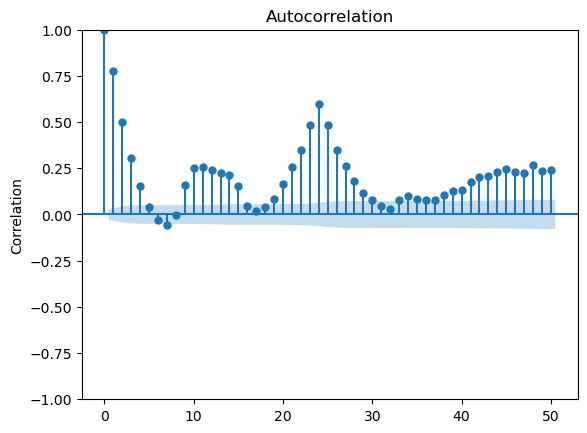

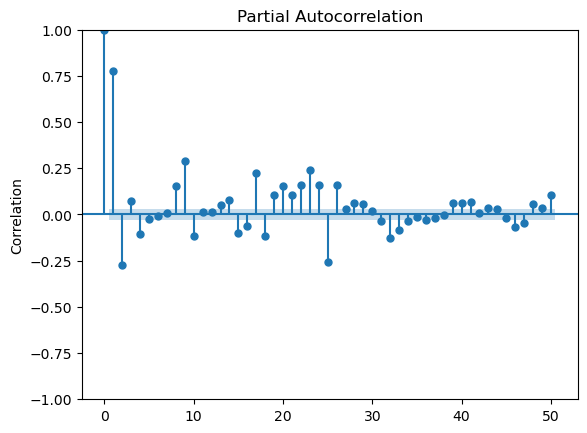

WARNING - (py.warnings._showwarnmsg) - C:\Users\KK\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(

WARNING - (py.warnings._showwarnmsg) - C:\Users\KK\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(



Normality Heteroscedasticity  Autocorr(lag10)  \
Test Statistics           0.93               0.98         4,725.91   
p-value                   0.00               0.58             0.00   
Alternative                NaN          two-sided              NaN   
Used Lag                   NaN                NaN              NaN   
Critical Value(1%)         NaN                NaN              NaN   
Critical Value(5%)         NaN                NaN              NaN   
Critical Value(10%)        NaN                NaN              NaN   

                     Autocorr(lag50)  Stationarity_ADF  Stationarity_KPSS  
Test Statistics            14,242.01             -4.24               7.76  
p-value                         0.00              0.00               0.01  
Alternative                      NaN               NaN                NaN  
Used Lag                         NaN             31.00              24.00  
Critical Value(1%)               NaN             -3.43               0.74  
Critical Value(5%)               NaN             -2.86               0.46  
Critical Value(10%)              NaN             -2.57               0.35

In [7]:
# NeuralProphet 데이터형식으로 변환
Y_train_neupro = Y_train.reset_index()
Y_train_neupro.columns = ['ds', 'y']
Y_test_neupro = Y_test.reset_index()
Y_test_neupro.columns = ['ds', 'y']

# 모델링
model_neupro = NeuralProphet(# Trend
                             growth='linear',    
                             changepoints=None,    
                             n_changepoints=20,    
                             changepoints_range=0.5, 
                             trend_reg=0.5,   
                             trend_reg_threshold=False,
                             epochs=30) 
model_neupro.fit(Y_train_neupro, validation_df=Y_test_neupro,
                 freq='auto', progress='plot')
model_neupro.plot_parameters()
plt.show()
Y_trpred = model_neupro.predict(Y_train_neupro, decompose=True, raw=True)
Y_trpred.set_index('ds', inplace=True)
Y_tepred = model_neupro.predict(Y_test_neupro, decompose=True, raw=True)
Y_tepred.set_index('ds', inplace=True)

# 검증
Score_neupro = evaluation_reg_trte(Y_train, Y_trpred.iloc[:,:1], Y_test, Y_tepred.iloc[:,:1])
display(Score_neupro)

# 결과 시각화
ax = Y_test.plot(figsize=(12,4))
pd.DataFrame(Y_tepred[['step0']]).plot(label='Time Sequence Prediction', ax=ax)
plt.legend(['Y_test', 'Y_tepred'])
plt.show()

# 에러 분석
Resid_te = Y_test - Y_tepred[['step0']].values
Resid_te.columns = ['Error']
Error_te = error_analysis_timeseries(X_test, Y_tepred, Resid_te, graph_on=True)
display(Error_te)

## 계절성 처리

| **반영 대상** 	| **파라미터명** 	| **의미** 	|
|:---:	|:---	|:---	|
| **추세** 	| growth 	| `off, linear, discontinuous` 	|
|  	| changepoints 	| CP가 발생하는 시점들의 list [`2012-01-01`] 	|
|  	| n_changepoints 	| CP의 잠재적인 갯수 	|
|  	| changepoints_range 	| CP의 기존 데이터 수 대비 최대 비율 	|
|  	| trend_reg 	| CP의 변화 자유도 정도(1미만은 빠르게 커지면 제한적) 	|
|  	| trend_reg_threshold 	| CP 추세를 부드럽게 세팅 	|
| **계절성** 	| seasonality_mode 	| `additive, multiplicative` 	|
|  	| seasonality_reg 	| 계절성 변화 자유도 정도(1미만은 넓은계절성 커지면 Dampen)  	|
|  	| yearly_seasonality 	| 연계절성 	|
|  	| weekly_seasonality 	| 주계절성 	|
|  	| daily_seasonality 	| 일계절성 	|


INFO - (NP.config.__post_init__) - Note: Trend changepoint regularization is experimental.
INFO - (NP.config.__post_init__) - Note: Fourier-based seasonality regularization is experimental.
INFO - (NP.df_utils._infer_frequency) - Major frequency H corresponds to 99.992% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as H
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 64
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 96
WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (206) is too small than the required number for the learning rate finder (253). The results might not be optimal.


Finding best initial lr:   0%|          | 0/253 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

WARNING - (NP.plotting.log_warning_deprecation_plotly) - DeprecationWarning: default plotting_backend will be changed to plotly in a future version. Switch to plotly by calling `m.set_plotting_backend('plotly')`.


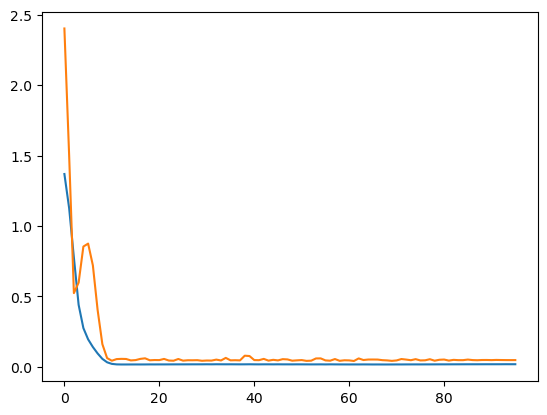

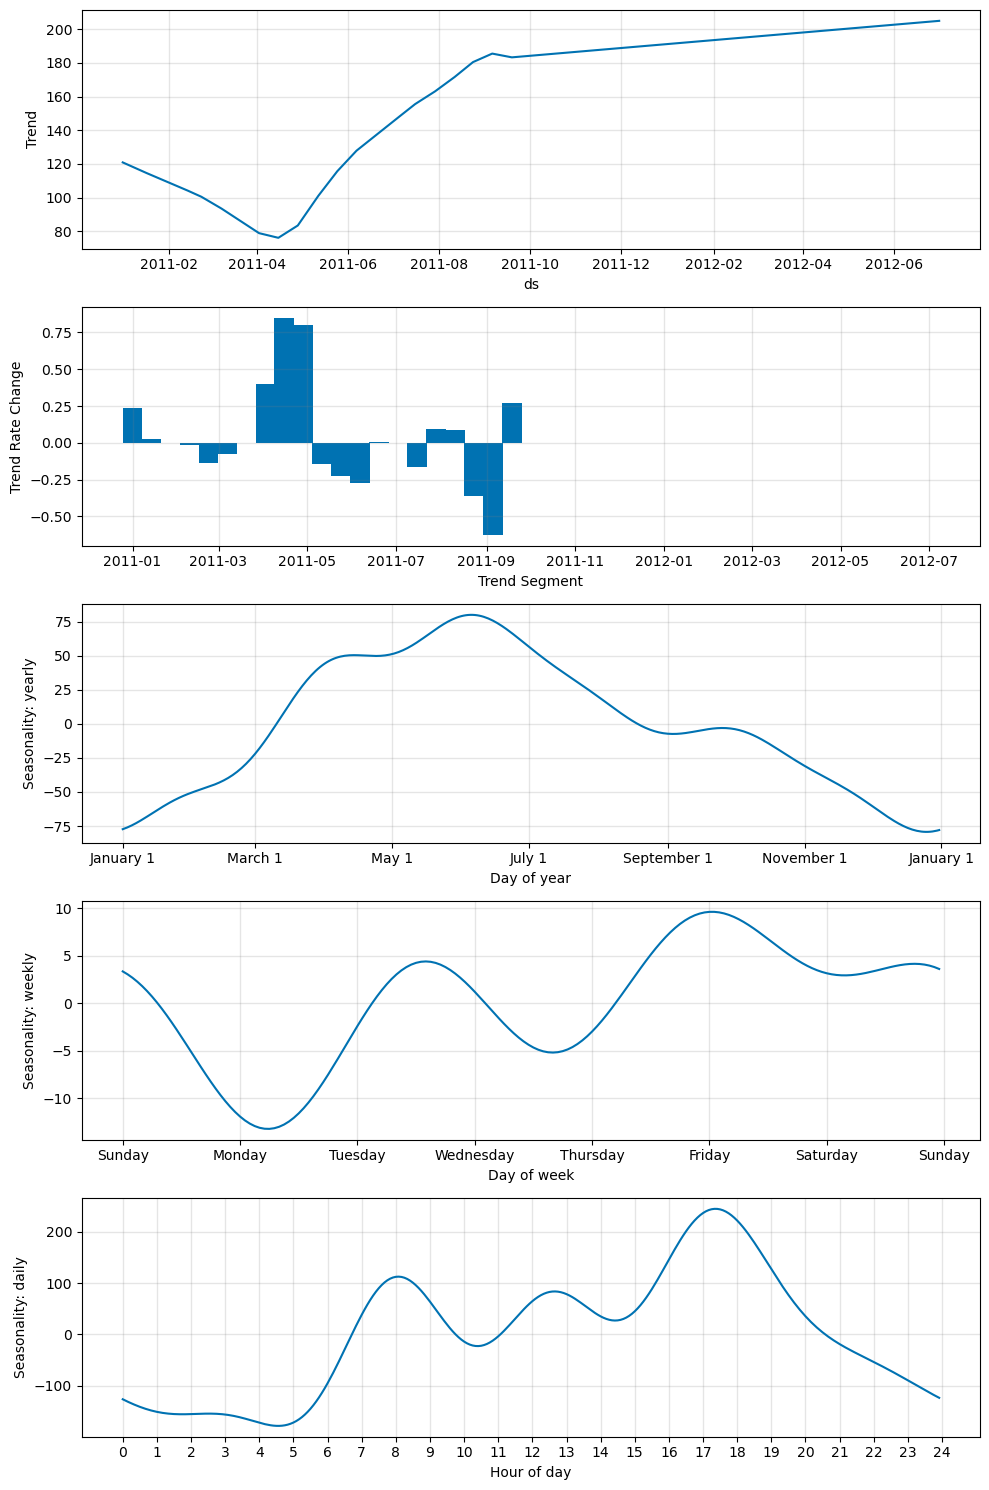

WARNING - (NP.forecaster.predict) - Raw forecasts are incompatible with plotting utilities
INFO - (NP.df_utils._infer_frequency) - Major frequency H corresponds to 99.992% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - H
INFO - (NP.df_utils._infer_frequency) - Major frequency H corresponds to 99.992% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - H


Predicting: 206it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (NP.forecaster.predict) - Raw forecasts are incompatible with plotting utilities
INFO - (NP.df_utils._infer_frequency) - Major frequency H corresponds to 99.977% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - H
INFO - (NP.df_utils._infer_frequency) - Major frequency H corresponds to 99.977% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - H


Predicting: 206it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


MAE       MSE  MAPE
Train  70.81  9,306.26  3.12
Test  104.62 23,609.69  1.26

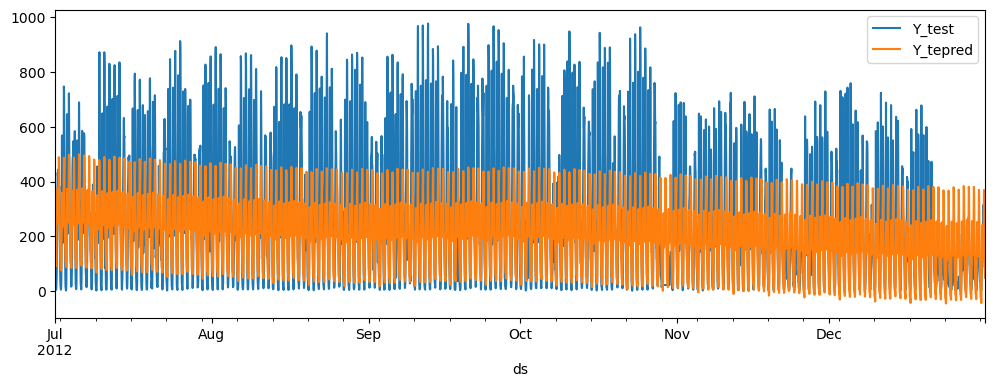

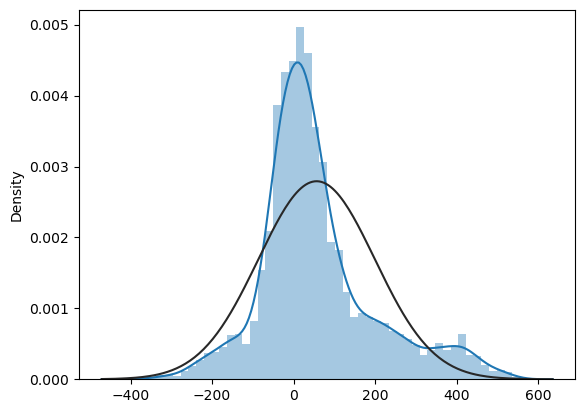

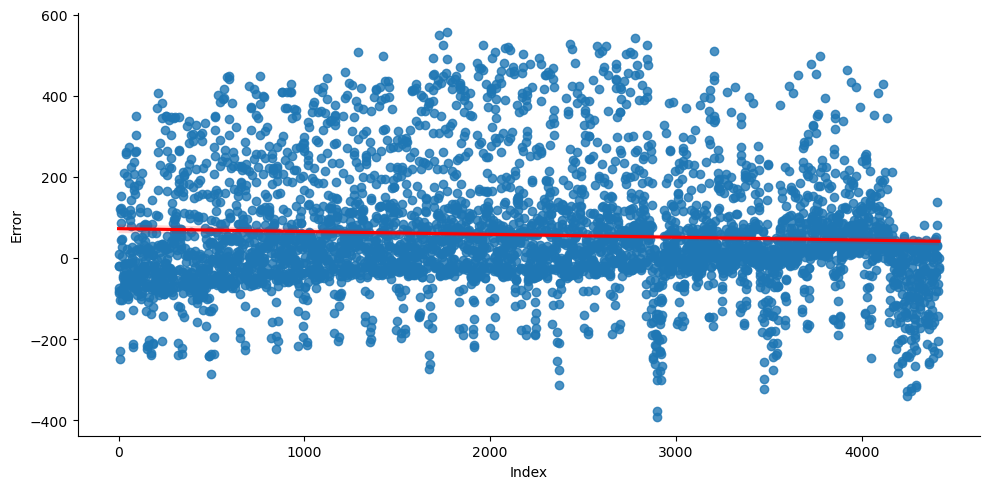

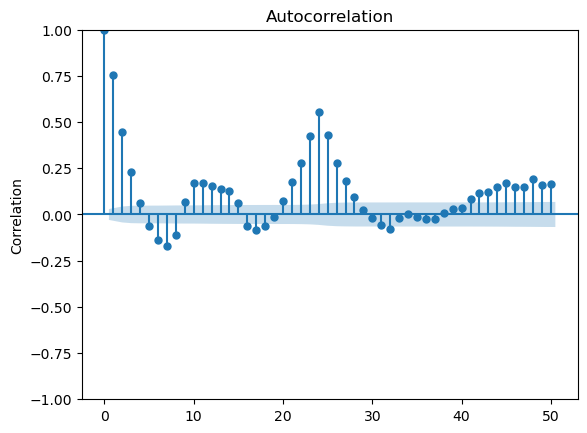

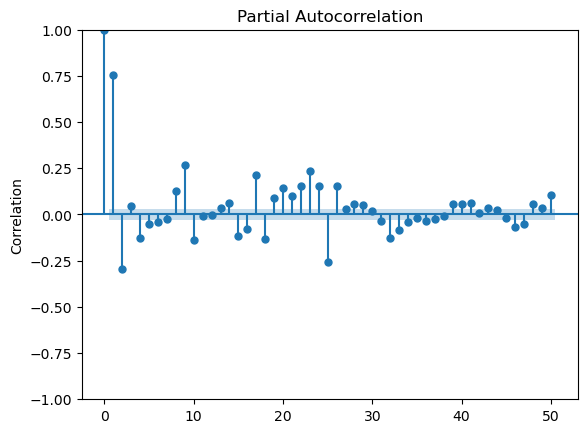

WARNING - (py.warnings._showwarnmsg) - C:\Users\KK\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(

WARNING - (py.warnings._showwarnmsg) - C:\Users\KK\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(



Normality Heteroscedasticity  Autocorr(lag10)  \
Test Statistics           0.93               0.86         4,079.04   
p-value                   0.00               0.00             0.00   
Alternative                NaN          two-sided              NaN   
Used Lag                   NaN                NaN              NaN   
Critical Value(1%)         NaN                NaN              NaN   
Critical Value(5%)         NaN                NaN              NaN   
Critical Value(10%)        NaN                NaN              NaN   

                     Autocorr(lag50)  Stationarity_ADF  Stationarity_KPSS  
Test Statistics             9,631.47             -5.78               1.83  
p-value                         0.00              0.00               0.01  
Alternative                      NaN               NaN                NaN  
Used Lag                         NaN             31.00              16.00  
Critical Value(1%)               NaN             -3.43               0.74  
Critical Value(5%)               NaN             -2.86               0.46  
Critical Value(10%)              NaN             -2.57               0.35

In [8]:
# NeuralProphet 데이터형식으로 변환
Y_train_neupro = Y_train.reset_index()
Y_train_neupro.columns = ['ds', 'y']
Y_test_neupro = Y_test.reset_index()
Y_test_neupro.columns = ['ds', 'y']

# 모델링
model_neupro = NeuralProphet(# Trend
                             growth='linear',    
                             changepoints=None,    
                             n_changepoints=20,    
                             changepoints_range=0.5, 
                             trend_reg=0.5,   
                             trend_reg_threshold=False,  
                             # Seasonality
                             seasonality_mode='additive',
                             seasonality_reg=1,   
                             yearly_seasonality=True,   
                             weekly_seasonality='auto', 
                             daily_seasonality='auto') 
model_neupro.fit(Y_train_neupro, validation_df=Y_test_neupro,
                 freq='auto', progress='plot')
model_neupro.plot_parameters()
plt.show()
Y_trpred = model_neupro.predict(Y_train_neupro, decompose=True, raw=True)
Y_trpred.set_index('ds', inplace=True)
Y_tepred = model_neupro.predict(Y_test_neupro, decompose=True, raw=True)
Y_tepred.set_index('ds', inplace=True)

# 검증
Score_neupro = evaluation_reg_trte(Y_train, Y_trpred.iloc[:,:1], Y_test, Y_tepred.iloc[:,:1])
display(Score_neupro)

# 결과 시각화
ax = Y_test.plot(figsize=(12,4))
pd.DataFrame(Y_tepred[['step0']]).plot(label='Time Sequence Prediction', ax=ax)
plt.legend(['Y_test', 'Y_tepred'])
plt.show()

# 에러 분석
Resid_te = Y_test - Y_tepred[['step0']].values
Resid_te.columns = ['Error']
Error_te = error_analysis_timeseries(X_test, Y_tepred, Resid_te, graph_on=True)
display(Error_te)

## 계절성 수동 추가: add_seasonality

INFO - (NP.config.__post_init__) - Note: Trend changepoint regularization is experimental.
INFO - (NP.config.__post_init__) - Note: Fourier-based seasonality regularization is experimental.
INFO - (NP.df_utils._infer_frequency) - Major frequency H corresponds to 99.992% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as H
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 64
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 96
WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (206) is too small than the required number for the learning rate finder (253). The results might not be optimal.


Finding best initial lr:   0%|          | 0/253 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

WARNING - (NP.plotting.log_warning_deprecation_plotly) - DeprecationWarning: default plotting_backend will be changed to plotly in a future version. Switch to plotly by calling `m.set_plotting_backend('plotly')`.


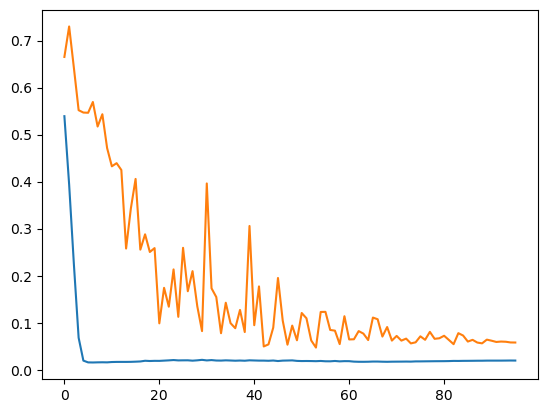

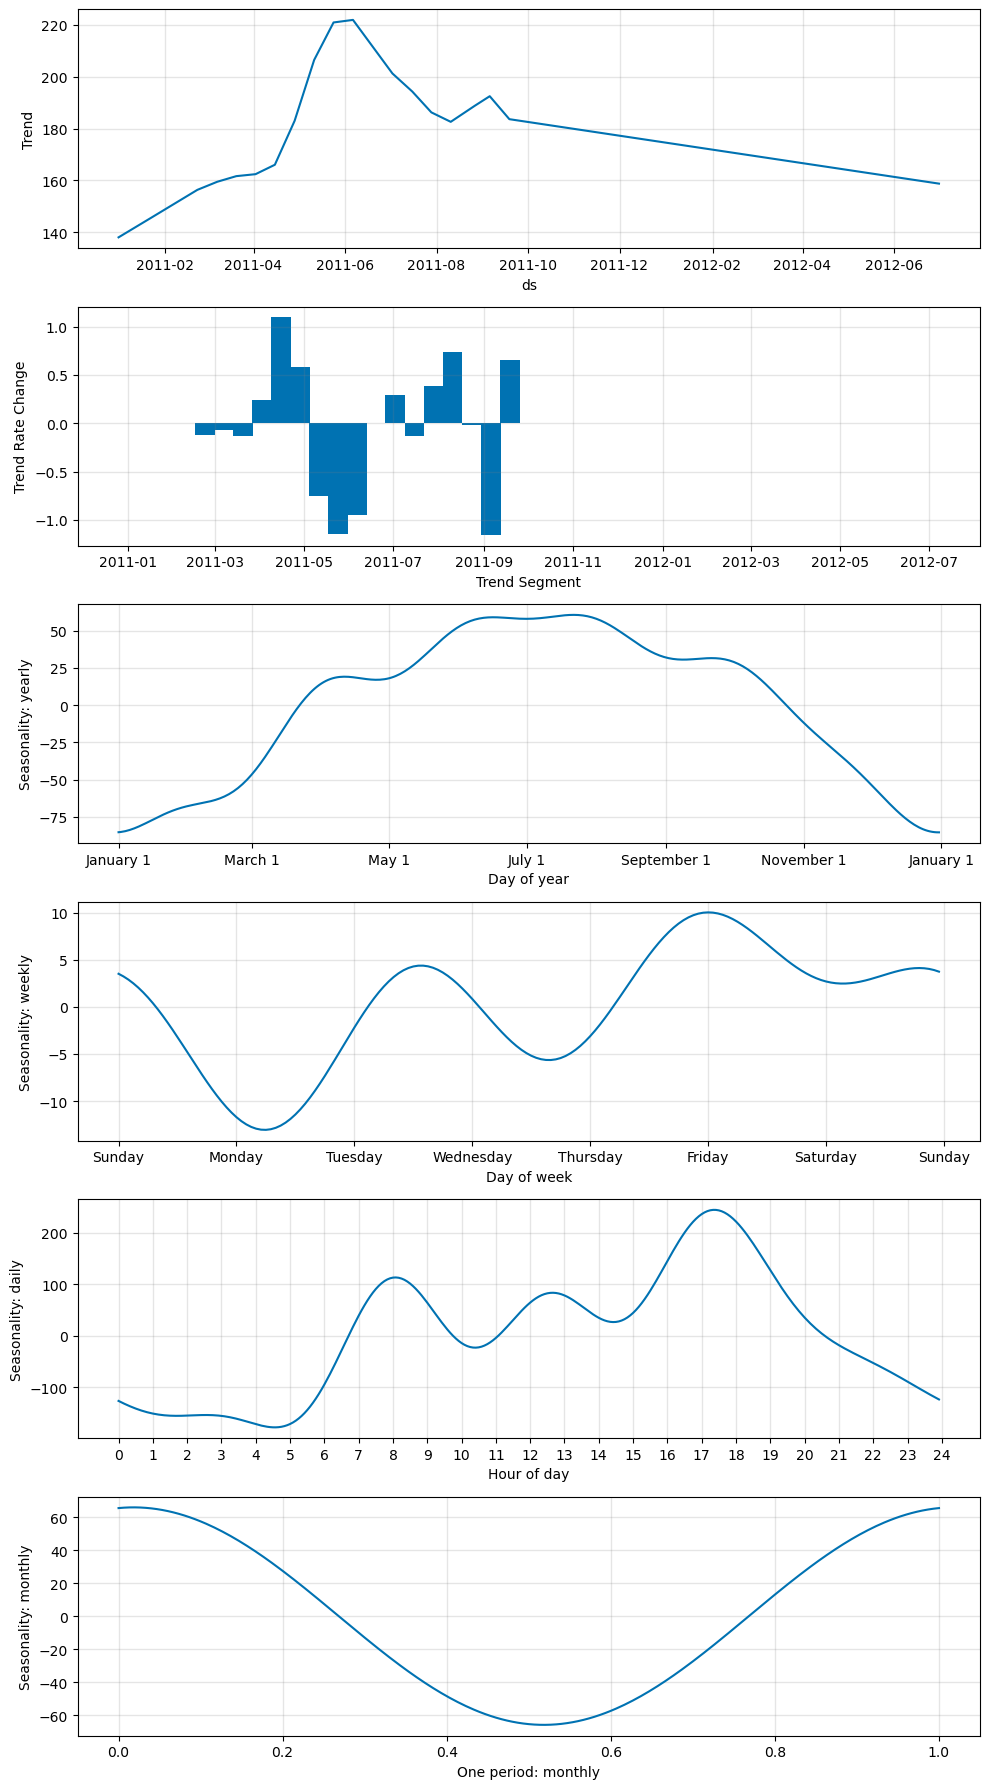

WARNING - (NP.forecaster.predict) - Raw forecasts are incompatible with plotting utilities
INFO - (NP.df_utils._infer_frequency) - Major frequency H corresponds to 99.992% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - H
INFO - (NP.df_utils._infer_frequency) - Major frequency H corresponds to 99.992% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - H


Predicting: 206it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (NP.forecaster.predict) - Raw forecasts are incompatible with plotting utilities
INFO - (NP.df_utils._infer_frequency) - Major frequency H corresponds to 99.977% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - H
INFO - (NP.df_utils._infer_frequency) - Major frequency H corresponds to 99.977% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - H


Predicting: 206it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


MAE       MSE  MAPE
Train  70.72  9,295.16  3.14
Test  124.25 28,138.63  2.34

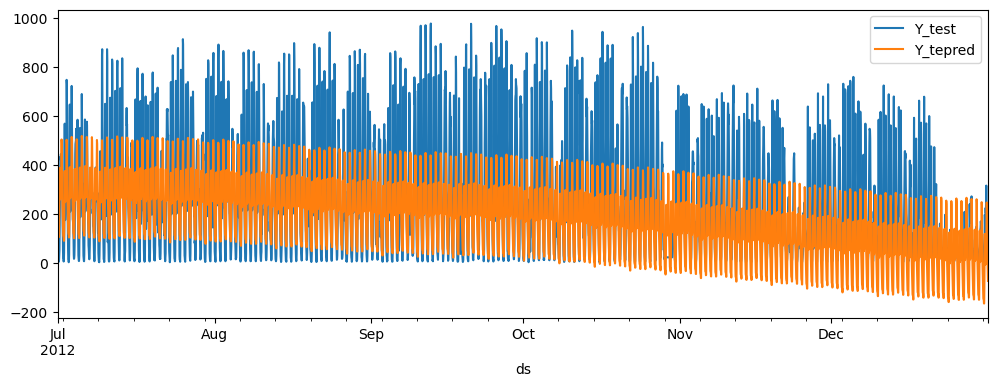

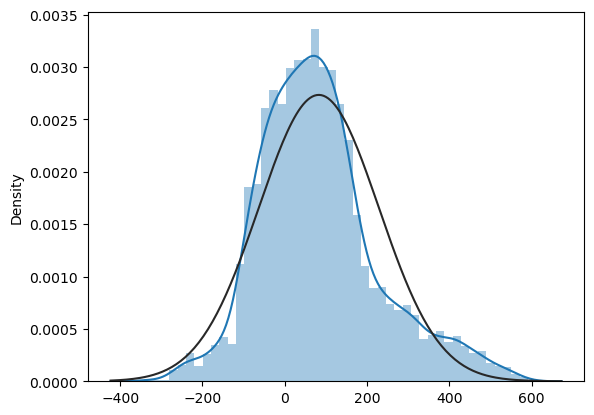

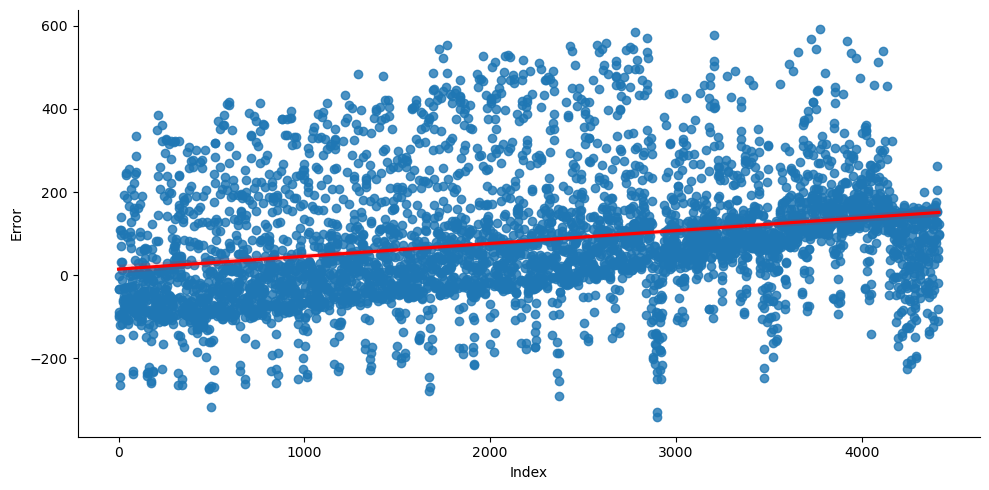

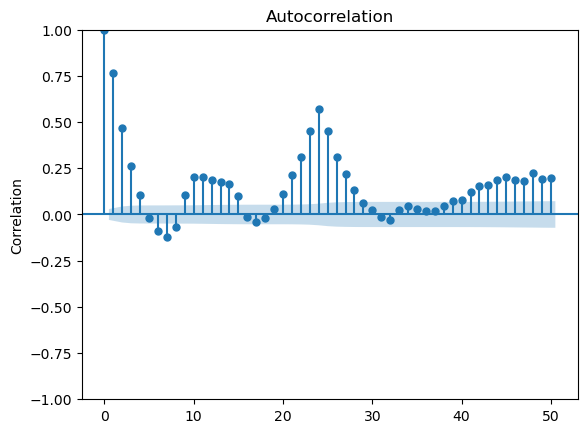

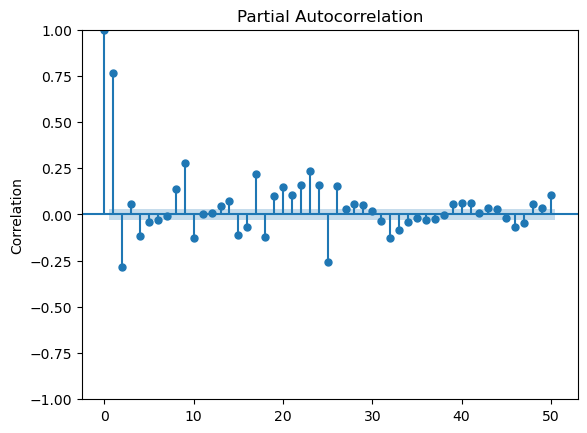

WARNING - (py.warnings._showwarnmsg) - C:\Users\KK\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(

WARNING - (py.warnings._showwarnmsg) - C:\Users\KK\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(



Normality Heteroscedasticity  Autocorr(lag10)  \
Test Statistics           0.97               0.93         4,263.73   
p-value                   0.00               0.11             0.00   
Alternative                NaN          two-sided              NaN   
Used Lag                   NaN                NaN              NaN   
Critical Value(1%)         NaN                NaN              NaN   
Critical Value(5%)         NaN                NaN              NaN   
Critical Value(10%)        NaN                NaN              NaN   

                     Autocorr(lag50)  Stationarity_ADF  Stationarity_KPSS  
Test Statistics            11,181.03             -5.25               7.73  
p-value                         0.00              0.00               0.01  
Alternative                      NaN               NaN                NaN  
Used Lag                         NaN             31.00              20.00  
Critical Value(1%)               NaN             -3.43               0.74  
Critical Value(5%)               NaN             -2.86               0.46  
Critical Value(10%)              NaN             -2.57               0.35

In [9]:
# NeuralProphet 데이터형식으로 변환
Y_train_neupro = Y_train.reset_index()
Y_train_neupro.columns = ['ds', 'y']
Y_test_neupro = Y_test.reset_index()
Y_test_neupro.columns = ['ds', 'y']

# 모델링
model_neupro = NeuralProphet(# Trend
                             growth='linear',    
                             changepoints=None,    
                             n_changepoints=20,    
                             changepoints_range=0.5, 
                             trend_reg=0.5,   
                             trend_reg_threshold=False,  
                             # Seasonality
                             seasonality_mode='additive',
                             seasonality_reg=1,   
                             yearly_seasonality=True,   
                             weekly_seasonality='auto', 
                             daily_seasonality='auto') 
### monthly seasonality ###
model_neupro.add_seasonality(name='monthly', period=24*7*4, fourier_order=1)
###########################
model_neupro.fit(Y_train_neupro, validation_df=Y_test_neupro,
                 freq='auto', progress='plot')
model_neupro.plot_parameters()
plt.show()
Y_trpred = model_neupro.predict(Y_train_neupro, decompose=True, raw=True)
Y_trpred.set_index('ds', inplace=True)
Y_tepred = model_neupro.predict(Y_test_neupro, decompose=True, raw=True)
Y_tepred.set_index('ds', inplace=True)

# 검증
Score_neupro = evaluation_reg_trte(Y_train, Y_trpred.iloc[:,:1], Y_test, Y_tepred.iloc[:,:1])
display(Score_neupro)

# 결과 시각화
ax = Y_test.plot(figsize=(12,4))
pd.DataFrame(Y_tepred[['step0']]).plot(label='Time Sequence Prediction', ax=ax)
plt.legend(['Y_test', 'Y_tepred'])
plt.show()

# 에러 분석
Resid_te = Y_test - Y_tepred[['step0']].values
Resid_te.columns = ['Error']
Error_te = error_analysis_timeseries(X_test, Y_tepred, Resid_te, graph_on=True)
display(Error_te)

## 국가이벤트 수동 추가: add_country_holidays

INFO - (NP.config.__post_init__) - Note: Trend changepoint regularization is experimental.
INFO - (NP.config.__post_init__) - Note: Fourier-based seasonality regularization is experimental.
INFO - (NP.df_utils._infer_frequency) - Major frequency H corresponds to 99.992% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as H
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 64
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 96
WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (206) is too small than the required number for the learning rate finder (253). The results might not be optimal.


Finding best initial lr:   0%|          | 0/253 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

WARNING - (NP.plotting.log_warning_deprecation_plotly) - DeprecationWarning: default plotting_backend will be changed to plotly in a future version. Switch to plotly by calling `m.set_plotting_backend('plotly')`.


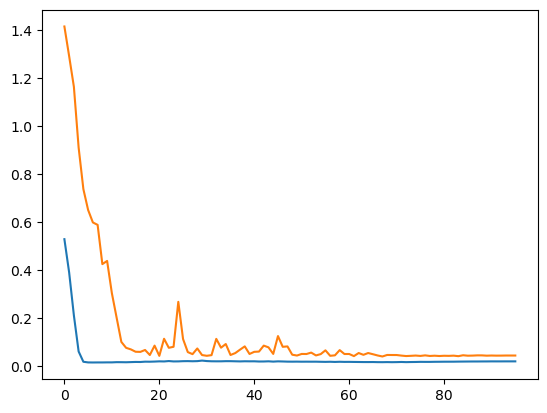

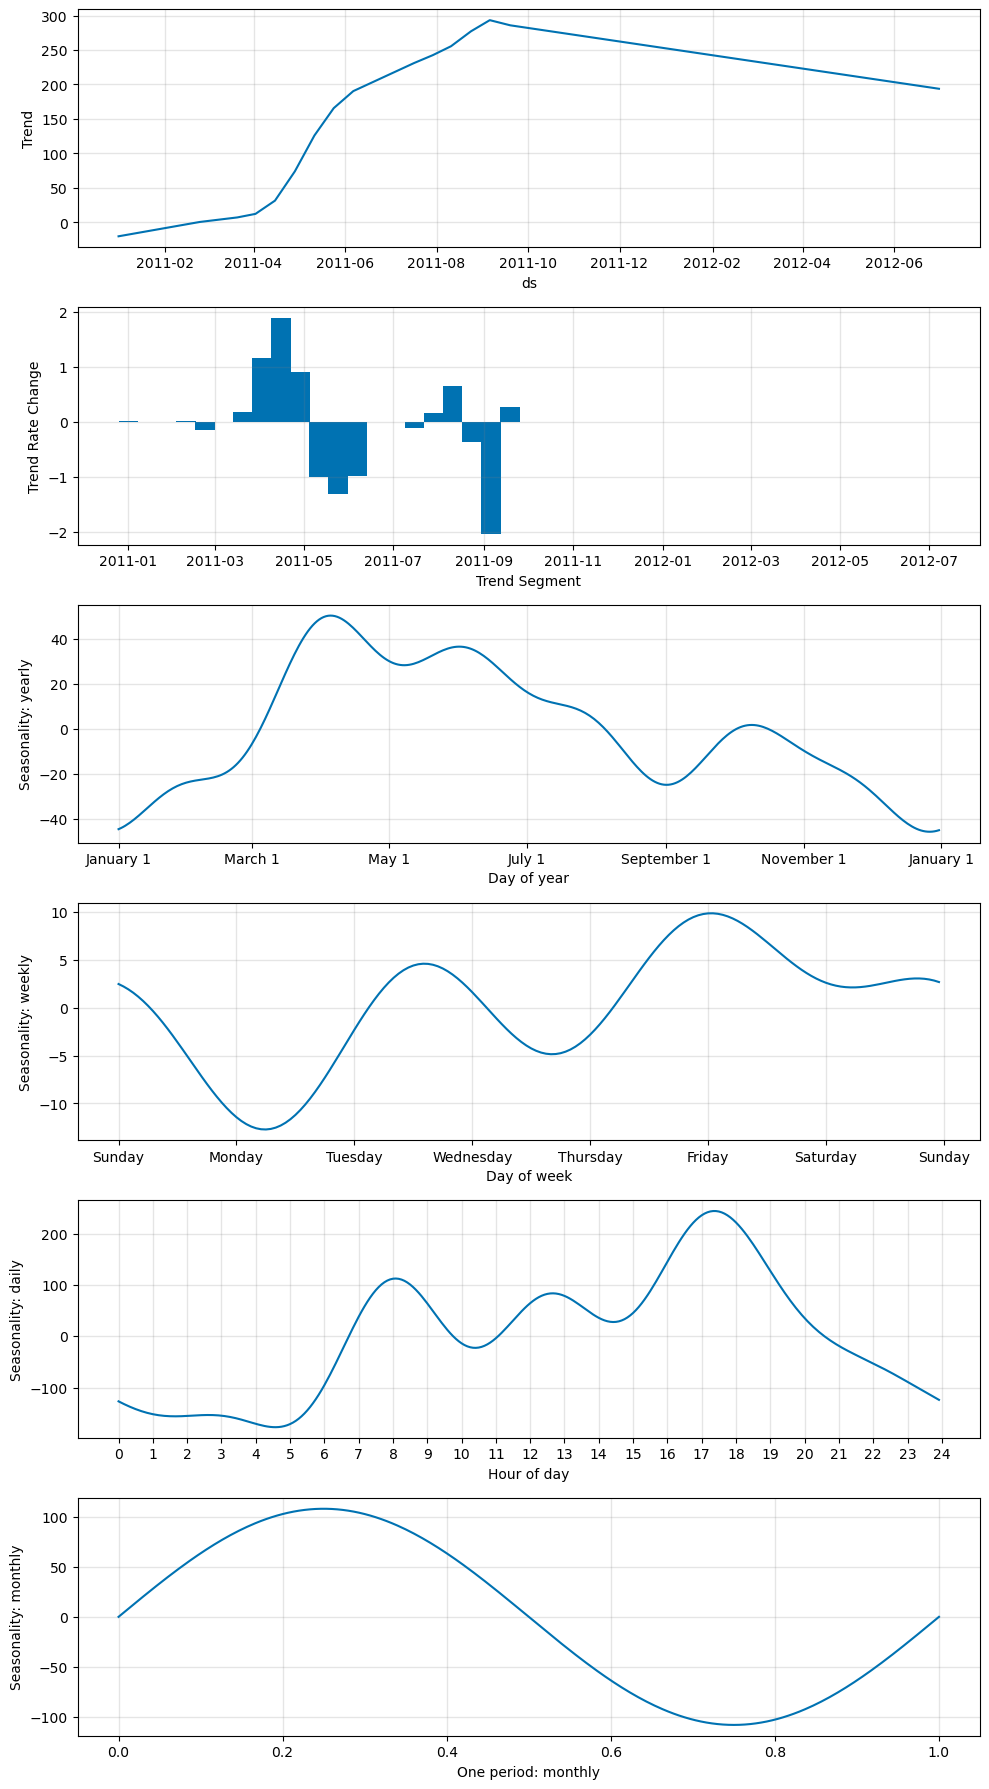

WARNING - (NP.forecaster.predict) - Raw forecasts are incompatible with plotting utilities
INFO - (NP.df_utils._infer_frequency) - Major frequency H corresponds to 99.992% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - H
INFO - (NP.df_utils._infer_frequency) - Major frequency H corresponds to 99.992% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - H


Predicting: 206it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (NP.forecaster.predict) - Raw forecasts are incompatible with plotting utilities
INFO - (NP.df_utils._infer_frequency) - Major frequency H corresponds to 99.977% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - H
INFO - (NP.df_utils._infer_frequency) - Major frequency H corresponds to 99.977% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - H


Predicting: 206it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


MAE       MSE  MAPE
Train  70.80  9,278.31  3.14
Test  102.31 20,019.36  2.20

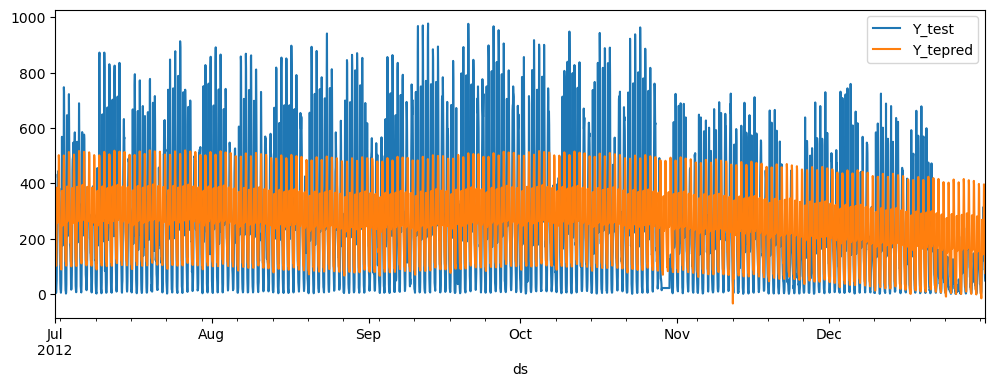

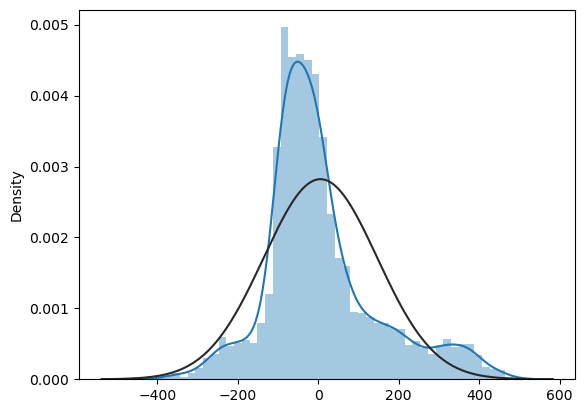

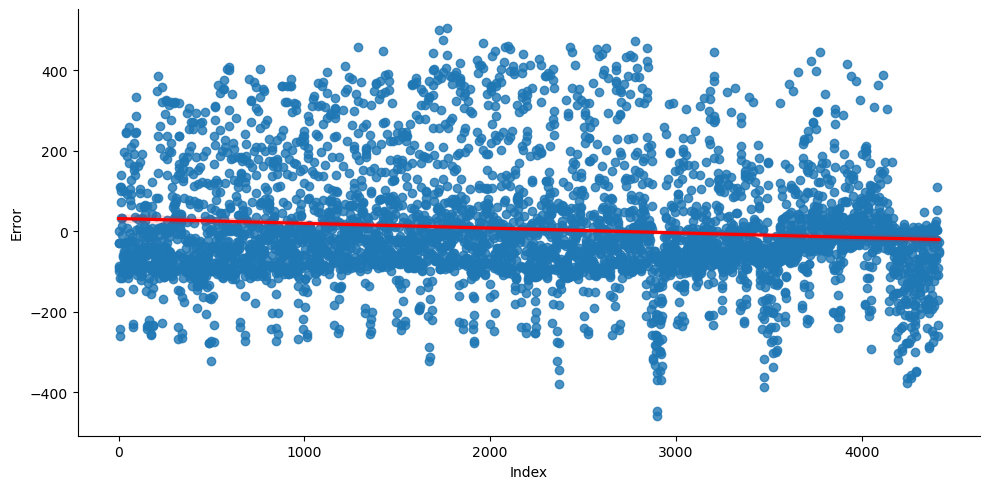

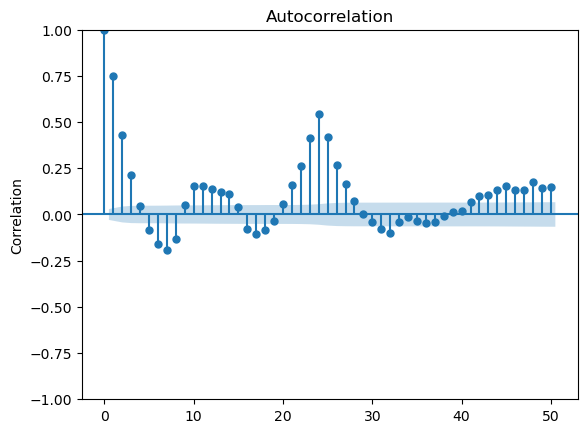

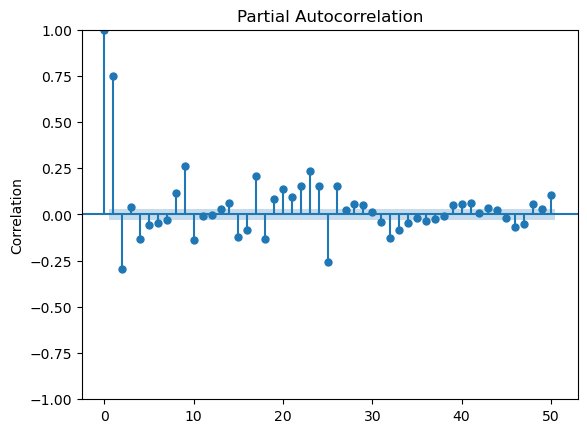

WARNING - (py.warnings._showwarnmsg) - C:\Users\KK\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(

WARNING - (py.warnings._showwarnmsg) - C:\Users\KK\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(



Normality Heteroscedasticity  Autocorr(lag10)  \
Test Statistics           0.93               0.94         4,025.03   
p-value                   0.00               0.12             0.00   
Alternative                NaN          two-sided              NaN   
Used Lag                   NaN                NaN              NaN   
Critical Value(1%)         NaN                NaN              NaN   
Critical Value(5%)         NaN                NaN              NaN   
Critical Value(10%)        NaN                NaN              NaN   

                     Autocorr(lag50)  Stationarity_ADF  Stationarity_KPSS  
Test Statistics             9,128.30             -6.17               2.39  
p-value                         0.00              0.00               0.01  
Alternative                      NaN               NaN                NaN  
Used Lag                         NaN             31.00              13.00  
Critical Value(1%)               NaN             -3.43               0.74  
Critical Value(5%)               NaN             -2.86               0.46  
Critical Value(10%)              NaN             -2.57               0.35

In [10]:
# NeuralProphet 데이터형식으로 변환
Y_train_neupro = Y_train.reset_index()
Y_train_neupro.columns = ['ds', 'y']
Y_test_neupro = Y_test.reset_index()
Y_test_neupro.columns = ['ds', 'y']

# 모델링
model_neupro = NeuralProphet(# Trend
                             growth='linear',    
                             changepoints=None,    
                             n_changepoints=20,    
                             changepoints_range=0.5, 
                             trend_reg=0.5,   
                             trend_reg_threshold=False,  
                             # Seasonality
                             seasonality_mode='additive',
                             seasonality_reg=1,   
                             yearly_seasonality=True,   
                             weekly_seasonality='auto', 
                             daily_seasonality='auto') 
### monthly seasonality ###
model_neupro.add_seasonality(name='monthly', period=24*7*4, fourier_order=1)
###########################
### holiday ###
model_neupro.add_country_holidays(country_name='US',
                                  mode='additive', 
                                  lower_window=0, upper_window=1)
###############
model_neupro.fit(Y_train_neupro, validation_df=Y_test_neupro,
                 freq='auto', progress='plot')
model_neupro.plot_parameters()
plt.show()
Y_trpred = model_neupro.predict(Y_train_neupro, decompose=True, raw=True)
Y_trpred.set_index('ds', inplace=True)
Y_tepred = model_neupro.predict(Y_test_neupro, decompose=True, raw=True)
Y_tepred.set_index('ds', inplace=True)

# 검증
Score_neupro = evaluation_reg_trte(Y_train, Y_trpred.iloc[:,:1], Y_test, Y_tepred.iloc[:,:1])
display(Score_neupro)

# 결과 시각화
ax = Y_test.plot(figsize=(12,4))
pd.DataFrame(Y_tepred[['step0']]).plot(label='Time Sequence Prediction', ax=ax)
plt.legend(['Y_test', 'Y_tepred'])
plt.show()

# 에러 분석
Resid_te = Y_test - Y_tepred[['step0']].values
Resid_te.columns = ['Error']
Error_te = error_analysis_timeseries(X_test, Y_tepred, Resid_te, graph_on=True)
display(Error_te)

## 특정이벤트 수동 추가: add_events

INFO - (NP.config.__post_init__) - Note: Trend changepoint regularization is experimental.
INFO - (NP.config.__post_init__) - Note: Fourier-based seasonality regularization is experimental.
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency H corresponds to 99.992% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as H
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 64
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 96
WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (206) is too small than the required number for the learning rate finder (253). The results might not be optimal.


Finding best initial lr:   0%|          | 0/253 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

WARNING - (NP.plotting.log_warning_deprecation_plotly) - DeprecationWarning: default plotting_backend will be changed to plotly in a future version. Switch to plotly by calling `m.set_plotting_backend('plotly')`.


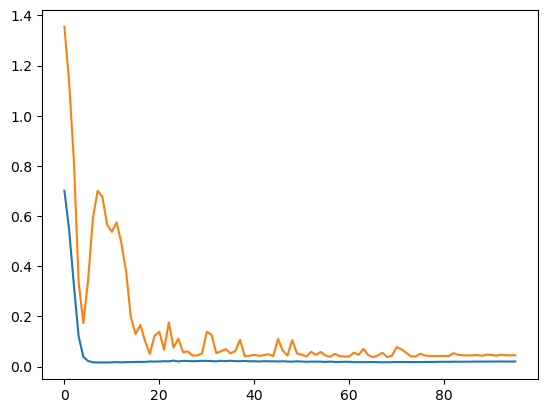

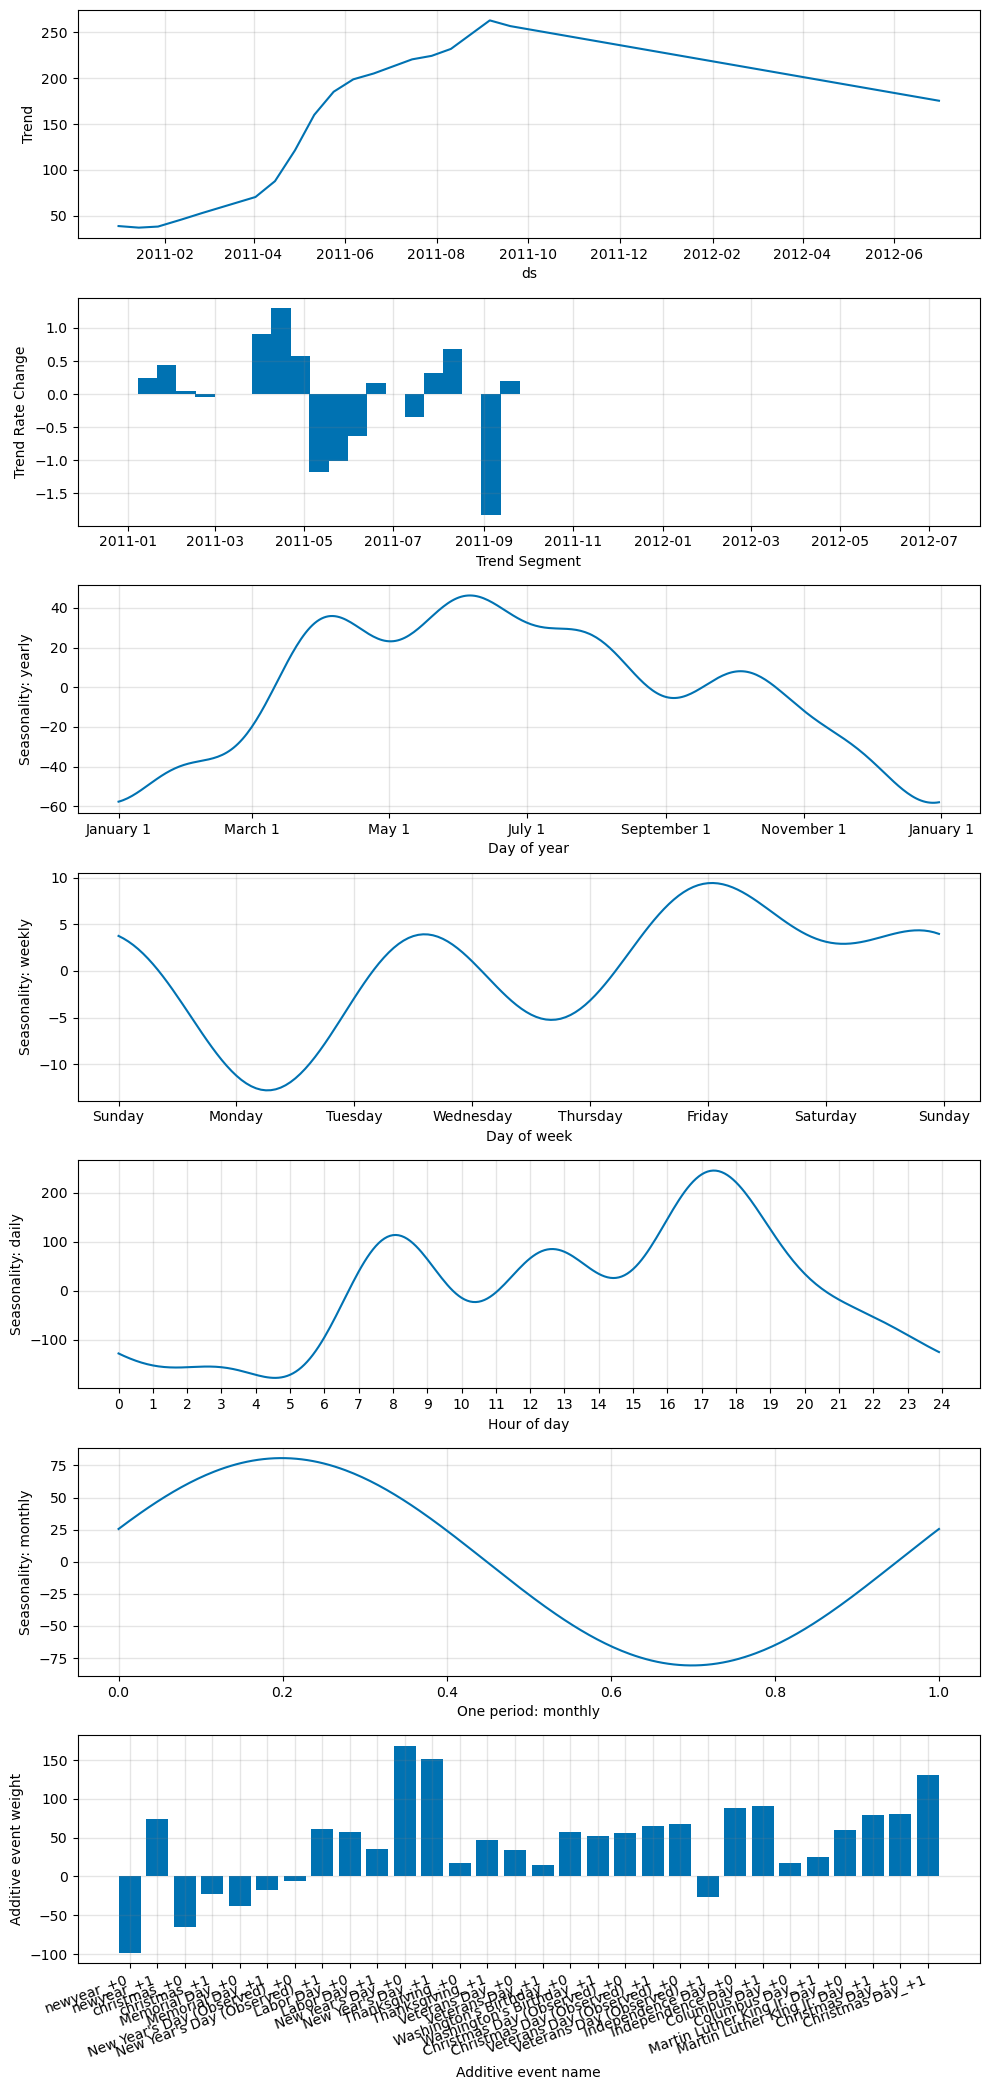

WARNING - (NP.forecaster.predict) - Raw forecasts are incompatible with plotting utilities
INFO - (NP.df_utils._infer_frequency) - Major frequency H corresponds to 99.992% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - H
INFO - (NP.df_utils._infer_frequency) - Major frequency H corresponds to 99.992% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - H


Predicting: 206it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (NP.forecaster.predict) - Raw forecasts are incompatible with plotting utilities
INFO - (NP.df_utils._infer_frequency) - Major frequency H corresponds to 99.977% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - H
INFO - (NP.df_utils._infer_frequency) - Major frequency H corresponds to 99.977% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - H


Predicting: 206it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


MAE       MSE  MAPE
Train  70.52  9,258.63  3.13
Test  102.57 21,347.54  1.79

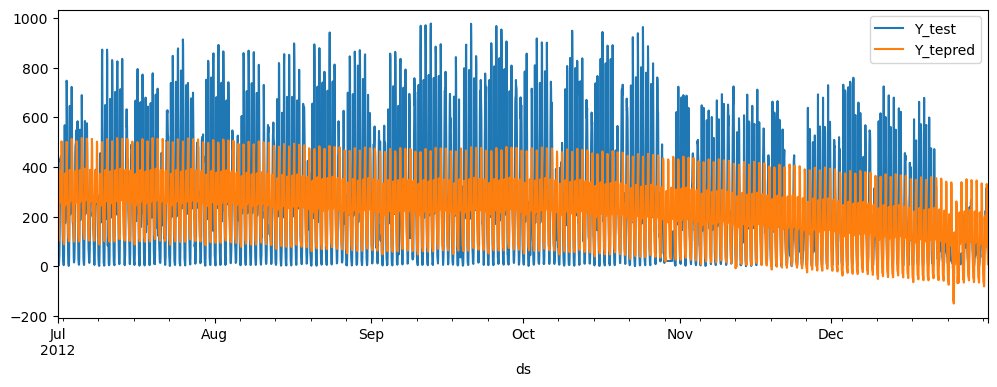

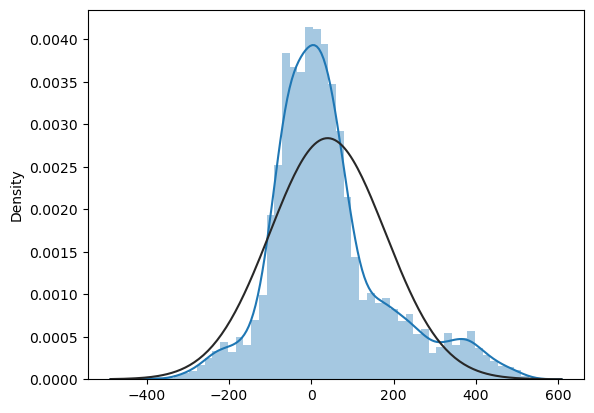

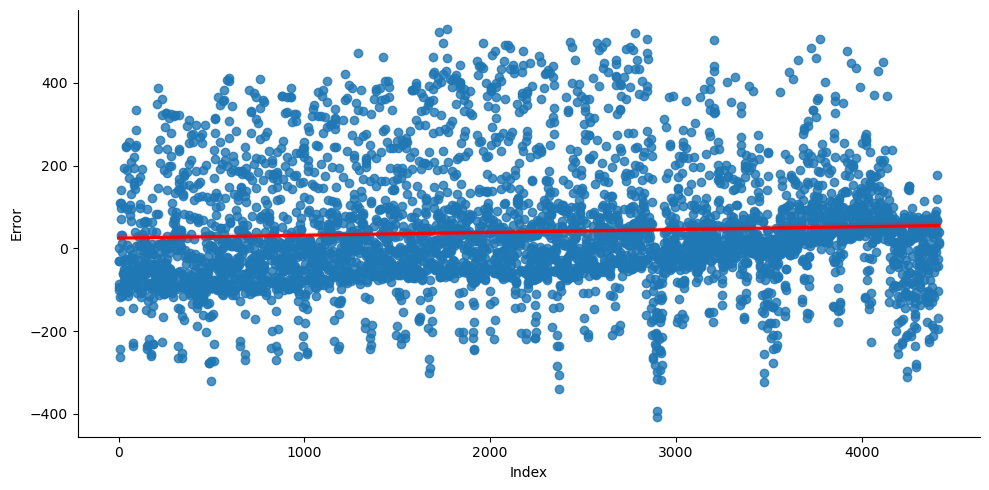

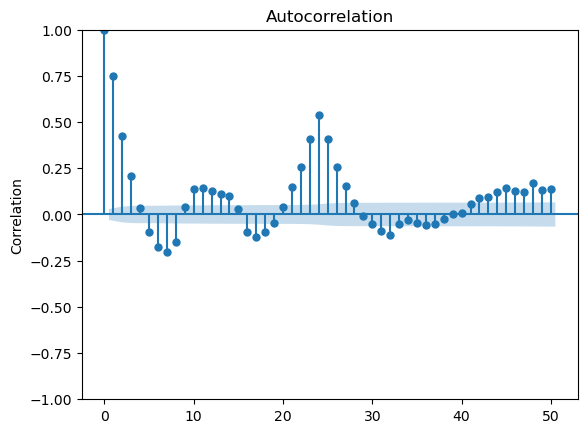

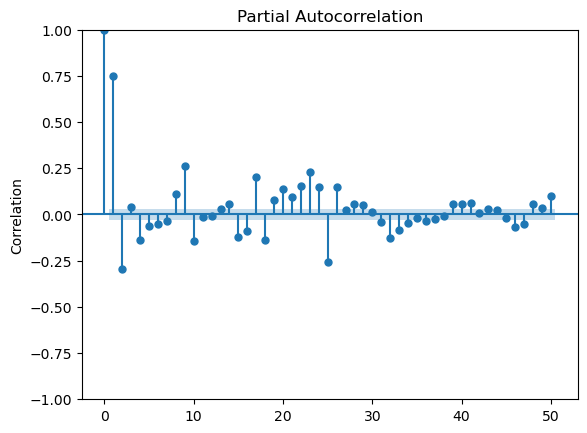

WARNING - (py.warnings._showwarnmsg) - C:\Users\KK\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(

WARNING - (py.warnings._showwarnmsg) - C:\Users\KK\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(



Normality Heteroscedasticity  Autocorr(lag10)  \
Test Statistics           0.94               1.08         4,016.21   
p-value                   0.00               0.08             0.00   
Alternative                NaN          two-sided              NaN   
Used Lag                   NaN                NaN              NaN   
Critical Value(1%)         NaN                NaN              NaN   
Critical Value(5%)         NaN                NaN              NaN   
Critical Value(10%)        NaN                NaN              NaN   

                     Autocorr(lag50)  Stationarity_ADF  Stationarity_KPSS  
Test Statistics             8,856.97             -6.61               1.29  
p-value                         0.00              0.00               0.01  
Alternative                      NaN               NaN                NaN  
Used Lag                         NaN             31.00              11.00  
Critical Value(1%)               NaN             -3.43               0.74  
Critical Value(5%)               NaN             -2.86               0.46  
Critical Value(10%)              NaN             -2.57               0.35

In [11]:
# NeuralProphet 데이터형식으로 변환
Y_train_neupro = Y_train.reset_index()
Y_train_neupro.columns = ['ds', 'y']
Y_test_neupro = Y_test.reset_index()
Y_test_neupro.columns = ['ds', 'y']

# 모델링
model_neupro = NeuralProphet(# Trend
                             growth='linear',    
                             changepoints=None,    
                             n_changepoints=20,    
                             changepoints_range=0.5, 
                             trend_reg=0.5,   
                             trend_reg_threshold=False,  
                             # Seasonality
                             seasonality_mode='additive',
                             seasonality_reg=1,   
                             yearly_seasonality=True,   
                             weekly_seasonality='auto', 
                             daily_seasonality='auto') 
### monthly seasonality ###
model_neupro.add_seasonality(name='monthly', period=24*7*4, fourier_order=1)
###########################
### holiday ###
model_neupro.add_country_holidays(country_name='US',
                                  mode='additive', 
                                  lower_window=0, upper_window=1)
###############
### event ###
newyear = pd.DataFrame({'event': 'newyear',
                        'ds': pd.date_range('2011-01-01', periods=24, freq='H').append(pd.date_range('2012-01-01', periods=24, freq='H'))})
christmas = pd.DataFrame({'event': 'christmas',
                          'ds': pd.date_range('2011-12-25', periods=24, freq='H').append(pd.date_range('2012-12-25', periods=24, freq='H'))})
df_events = pd.concat([newyear, christmas])
model_neupro = model_neupro.add_events(list(df_events['event'].unique()), 
                                       lower_window=0, upper_window=1, 
                                       mode='additive')
Y_train_neupro = model_neupro.create_df_with_events(Y_train_neupro, df_events)
Y_test_neupro = model_neupro.create_df_with_events(Y_test_neupro, df_events)
#############
model_neupro.fit(Y_train_neupro, validation_df=Y_test_neupro,
                 freq='auto', progress='plot')
model_neupro.plot_parameters()
plt.show()
Y_trpred = model_neupro.predict(Y_train_neupro, decompose=True, raw=True)
Y_trpred.set_index('ds', inplace=True)
Y_tepred = model_neupro.predict(Y_test_neupro, decompose=True, raw=True)
Y_tepred.set_index('ds', inplace=True)

# 검증
Score_neupro = evaluation_reg_trte(Y_train, Y_trpred.iloc[:,:1], Y_test, Y_tepred.iloc[:,:1])
display(Score_neupro)

# 결과 시각화
ax = Y_test.plot(figsize=(12,4))
pd.DataFrame(Y_tepred[['step0']]).plot(label='Time Sequence Prediction', ax=ax)
plt.legend(['Y_test', 'Y_tepred'])
plt.show()

# 에러 분석
Resid_te = Y_test - Y_tepred[['step0']].values
Resid_te.columns = ['Error']
Error_te = error_analysis_timeseries(X_test, Y_tepred, Resid_te, graph_on=True)
display(Error_te)

## 독립변수 추가: add_lagged_regressor

| **반영 대상** 	| **파라미터명** 	| **의미** 	|
|:---:	|:---	|:---	|
| **추세** 	| growth 	| `off, linear, discontinuous` 	|
|  	| changepoints 	| CP가 발생하는 시점들의 list [`2012-01-01`] 	|
|  	| n_changepoints 	| CP의 잠재적인 갯수 	|
|  	| changepoints_range 	| CP의 기존 데이터 수 대비 최대 비율 	|
|  	| trend_reg 	| CP의 변화 자유도 정도(1미만은 빠르게 커지면 제한적) 	|
|  	| trend_reg_threshold 	| CP 추세를 부드럽게 세팅 	|
| **계절성** 	| seasonality_mode 	| `additive, multiplicative` 	|
|  	| seasonality_reg 	| 계절성 변화 자유도 정도(1미만은 넓은계절성 커지면 Dampen)  	|
|  	| yearly_seasonality 	| 연계절성 	|
|  	| weekly_seasonality 	| 주계절성 	|
|  	| daily_seasonality 	| 일계절성 	|
| **결측치처리** 	| impute_missing 	| 데이터 결측값을 자동으로 대체 	|
|  	| impute_linear 	| 선형방식으로 결측값 대체 최대 개수 	|
|  	| impute_rolling 	| Rolling Window방식으로 결측값 대체 최대 개수 	|
|  	| drop_missing 	| 데이터 결측값을 자동으로 제거 	|

INFO - (NP.config.__post_init__) - Note: Trend changepoint regularization is experimental.
INFO - (NP.config.__post_init__) - Note: Fourier-based seasonality regularization is experimental.
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.forecaster.add_lagged_regressor) - n_lags = 'auto', but there is no lags for Autoregression. Number of lags for regressor is automatically set to 1
INFO - (NP.df_utils._infer_frequency) - Major frequency H corresponds to 99.992% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as H
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 64
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 96
WARNING - (NP.config.set_lr_finder_args) - Learning rate finde

Finding best initial lr:   0%|          | 0/253 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

WARNING - (NP.plotting.log_warning_deprecation_plotly) - DeprecationWarning: default plotting_backend will be changed to plotly in a future version. Switch to plotly by calling `m.set_plotting_backend('plotly')`.


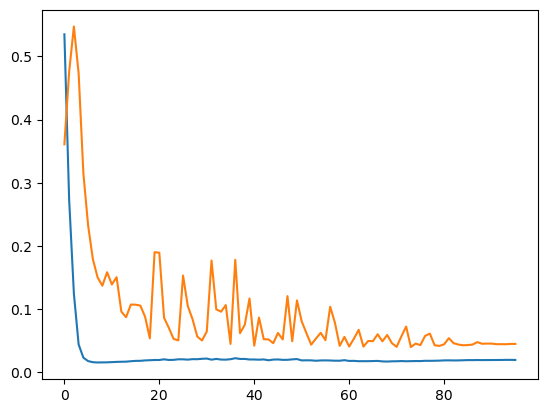

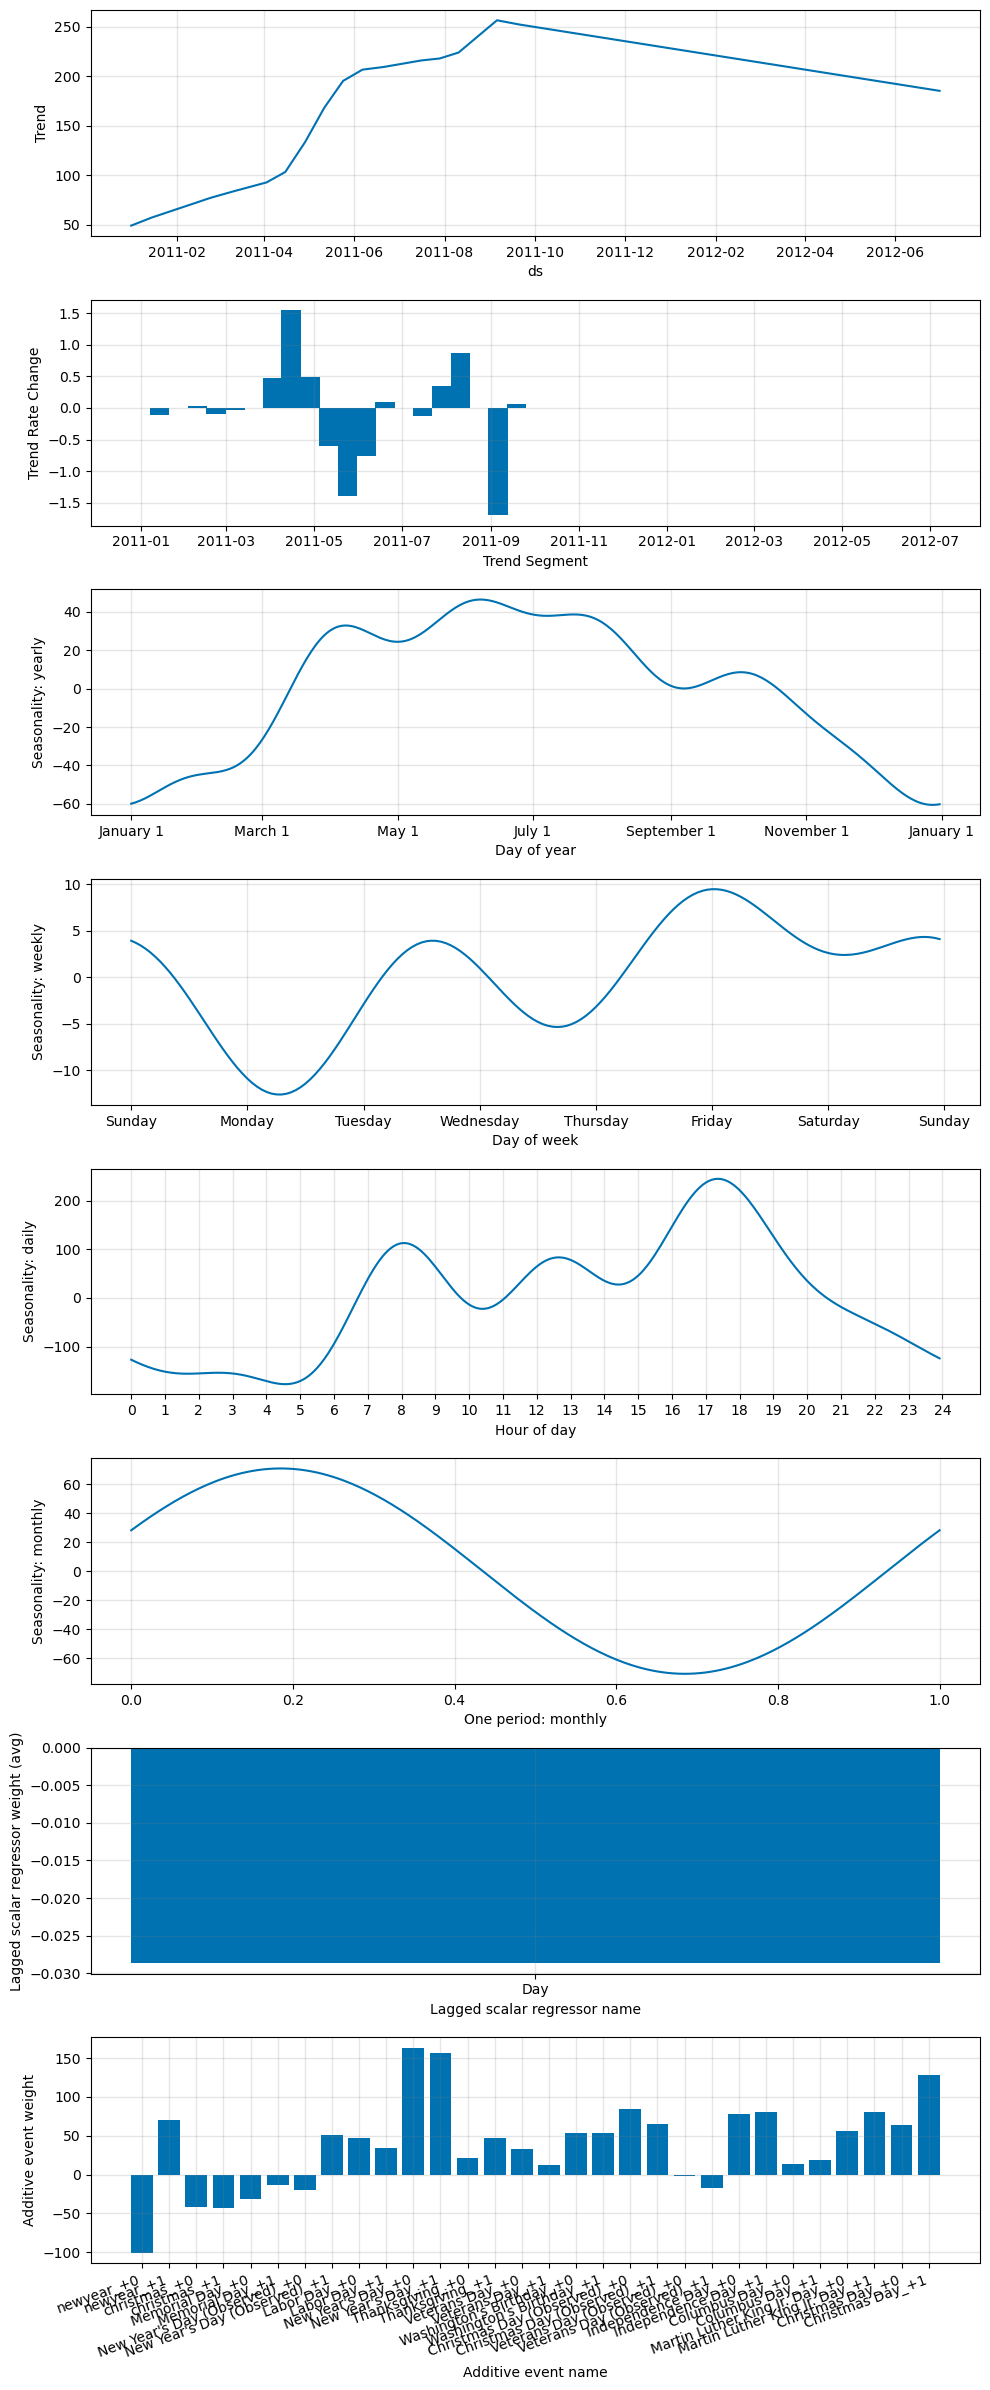

WARNING - (NP.forecaster.predict) - Raw forecasts are incompatible with plotting utilities
INFO - (NP.df_utils._infer_frequency) - Major frequency H corresponds to 99.992% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - H
INFO - (NP.df_utils._infer_frequency) - Major frequency H corresponds to 99.992% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - H


Predicting: 206it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (NP.forecaster.predict) - Raw forecasts are incompatible with plotting utilities
INFO - (NP.df_utils._infer_frequency) - Major frequency H corresponds to 99.977% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - H
INFO - (NP.df_utils._infer_frequency) - Major frequency H corresponds to 99.977% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - H


Predicting: 206it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


MAE       MSE  MAPE
Train  70.53  9,258.33  3.13
Test  103.71 21,549.20  1.84

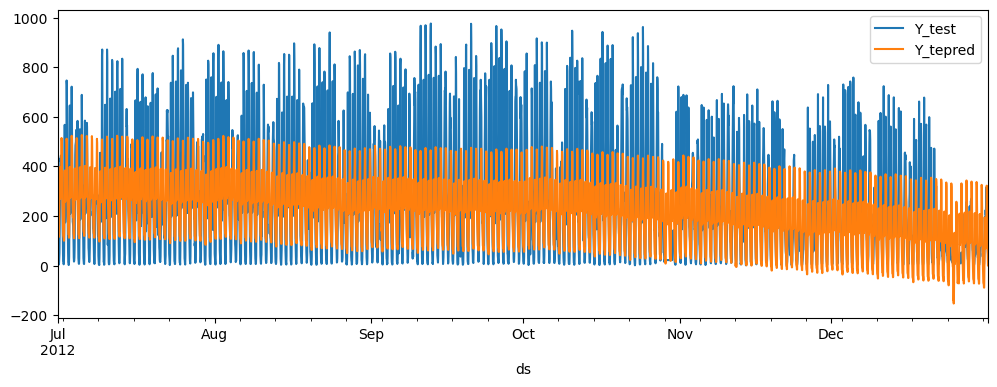

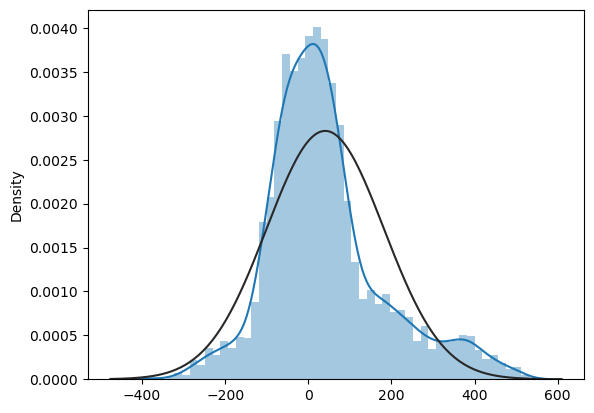

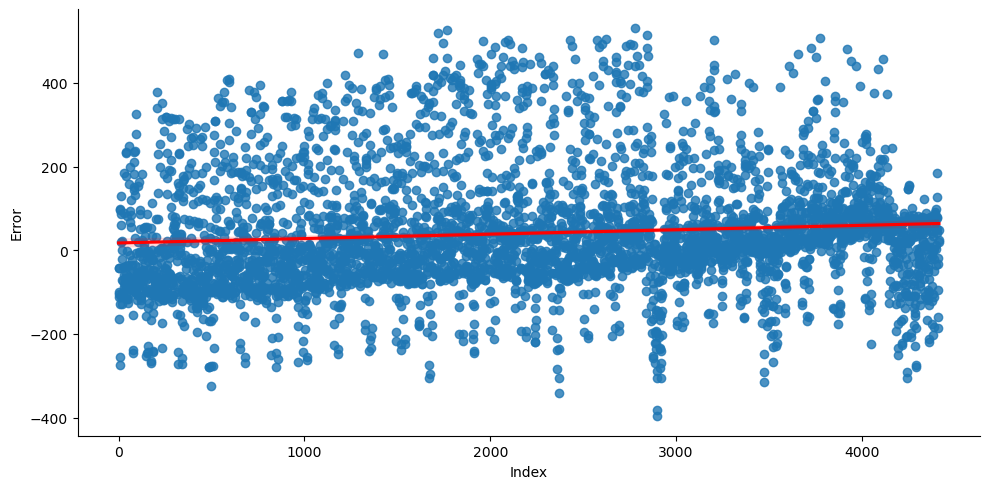

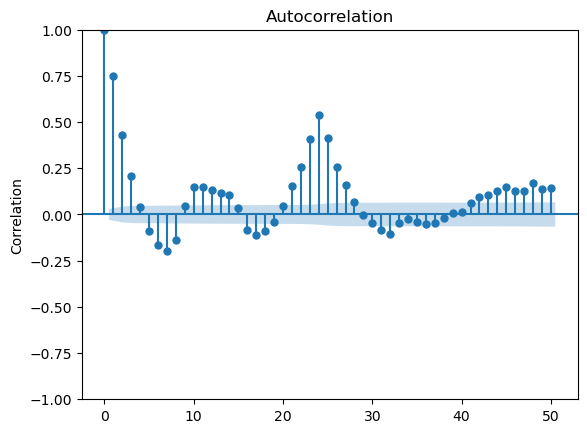

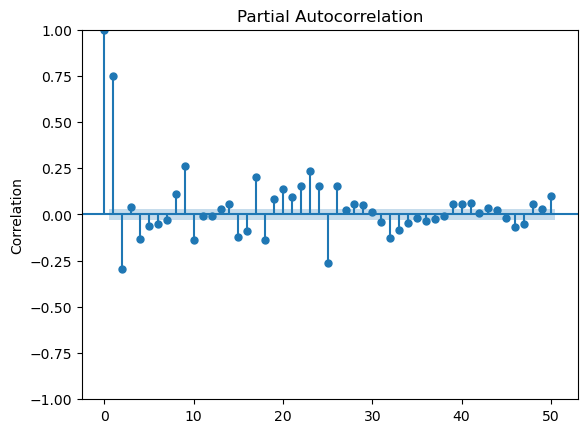

WARNING - (py.warnings._showwarnmsg) - C:\Users\KK\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(

WARNING - (py.warnings._showwarnmsg) - C:\Users\KK\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(



Normality Heteroscedasticity  Autocorr(lag10)  \
Test Statistics           0.94               1.06         4,012.06   
p-value                   0.00               0.21             0.00   
Alternative                NaN          two-sided              NaN   
Used Lag                   NaN                NaN              NaN   
Critical Value(1%)         NaN                NaN              NaN   
Critical Value(5%)         NaN                NaN              NaN   
Critical Value(10%)        NaN                NaN              NaN   

                     Autocorr(lag50)  Stationarity_ADF  Stationarity_KPSS  
Test Statistics             8,947.78             -6.46               2.07  
p-value                         0.00              0.00               0.01  
Alternative                      NaN               NaN                NaN  
Used Lag                         NaN             31.00              12.00  
Critical Value(1%)               NaN             -3.43               0.74  
Critical Value(5%)               NaN             -2.86               0.46  
Critical Value(10%)              NaN             -2.57               0.35

In [12]:
# NeuralProphet 데이터형식으로 변환
Y_train_neupro = Y_train.reset_index()
Y_train_neupro.columns = ['ds', 'y']
Y_test_neupro = Y_test.reset_index()
Y_test_neupro.columns = ['ds', 'y']

# 모델링
model_neupro = NeuralProphet(# Trend
                             growth='linear',    
                             changepoints=None,    
                             n_changepoints=20,    
                             changepoints_range=0.5, 
                             trend_reg=0.5,   
                             trend_reg_threshold=False,  
                             # Seasonality
                             seasonality_mode='additive',
                             seasonality_reg=1,   
                             yearly_seasonality=True,   
                             weekly_seasonality='auto', 
                             daily_seasonality='auto', 
                             # Setting
                             impute_missing=True,
                             drop_missing=False)
### monthly seasonality ###
model_neupro.add_seasonality(name='monthly', period=24*7*4, fourier_order=1)
###########################
### holiday ###
model_neupro.add_country_holidays(country_name='US',
                                  mode='additive', 
                                  lower_window=0, upper_window=1)
###############
### event ###
newyear = pd.DataFrame({'event': 'newyear',
                        'ds': pd.date_range('2011-01-01', periods=24, freq='H').append(pd.date_range('2012-01-01', periods=24, freq='H'))})
christmas = pd.DataFrame({'event': 'christmas',
                          'ds': pd.date_range('2011-12-25', periods=24, freq='H').append(pd.date_range('2012-12-25', periods=24, freq='H'))})
df_events = pd.concat([newyear, christmas])
model_neupro = model_neupro.add_events(list(df_events['event'].unique()), 
                                       lower_window=0, upper_window=1, 
                                       mode='additive')
Y_train_neupro = model_neupro.create_df_with_events(Y_train_neupro, df_events)
Y_test_neupro = model_neupro.create_df_with_events(Y_test_neupro, df_events)
#############
### extra feature ###
X_colname = X_train_RSM.columns[3:4]
for col in X_colname:
    model_neupro.add_lagged_regressor(col)
Y_train_neupro = pd.concat([Y_train_neupro, X_train_RSM[X_colname].reset_index().iloc[:,1:]], axis=1)
Y_test_neupro = pd.concat([Y_test_neupro, X_test_RSM[X_colname].reset_index().iloc[:,1:]], axis=1)
#####################
model_neupro.fit(Y_train_neupro, validation_df=Y_test_neupro,
                 freq='auto', progress='plot')
model_neupro.plot_parameters()
plt.show()
Y_trpred = model_neupro.predict(Y_train_neupro, decompose=True, raw=True)
Y_trpred.set_index('ds', inplace=True)
Y_tepred = model_neupro.predict(Y_test_neupro, decompose=True, raw=True)
Y_tepred.set_index('ds', inplace=True)

# 검증
Score_neupro = evaluation_reg_trte(Y_train.iloc[1:,:], Y_trpred.iloc[:,:1], Y_test.iloc[1:,:], Y_tepred.iloc[:,:1])
display(Score_neupro)

# 결과 시각화
ax = Y_test.plot(figsize=(12,4))
pd.DataFrame(Y_tepred[['step0']]).plot(label='Time Sequence Prediction', ax=ax)
plt.legend(['Y_test', 'Y_tepred'])
plt.show()

# 에러 분석
Resid_te = Y_test.iloc[1:,:] - Y_tepred[['step0']].values
Resid_te.columns = ['Error']
Error_te = error_analysis_timeseries(X_test.iloc[1:,:], Y_tepred, Resid_te, graph_on=True)
display(Error_te)

## 자기회귀 신경네트워크 처리

| **반영 대상** 	| **파라미터명** 	| **의미** 	|
|:---:	|:---	|:---	|
| **추세** 	| growth 	| `off, linear, discontinuous` 	|
|  	| changepoints 	| CP가 발생하는 시점들의 list [`2012-01-01`] 	|
|  	| n_changepoints 	| CP의 잠재적인 갯수 	|
|  	| changepoints_range 	| CP의 기존 데이터 수 대비 최대 비율 	|
|  	| trend_reg 	| CP의 변화 자유도 정도(1미만은 빠르게 커지면 제한적) 	|
|  	| trend_reg_threshold 	| CP 추세를 부드럽게 세팅 	|
| **계절성** 	| seasonality_mode 	| `additive, multiplicative` 	|
|  	| seasonality_reg 	| 계절성 변화 자유도 정도(1미만은 넓은계절성 커지면 Dampen)  	|
|  	| yearly_seasonality 	| 연계절성 	|
|  	| weekly_seasonality 	| 주계절성 	|
|  	| daily_seasonality 	| 일계절성 	|
| **결측치처리** 	| impute_missing 	| 데이터 결측값을 자동으로 대체 	|
|  	| impute_linear 	| 선형방식으로 결측값 대체 최대 개수 	|
|  	| impute_rolling 	| Rolling Window방식으로 결측값 대체 최대 개수 	|
|  	| drop_missing 	| 데이터 결측값을 자동으로 제거 	|
| **AR-Net** 	| n_lags 	| AR-Net 차수 	|
|  	| num_hidden_layers 	| AR-Net이 포함하는 히든네트워크 개수 	|
|  	| d_hidden 	| 히든네트워크의 차원 	|
|  	| ar_reg 	| 0이아닌 계수 개수(1미만은 많이 커지면 적게) 	|
| **모델링설정** 	| n_forecasts 	| 미래 예측 시점 	|
|  	| normalize 	| `soft(default), soft1, off, minmax, standardize`  	|
|  	| learning_rate 	| 학습 업데이트 속도 	|
|  	| epochs 	| 전체 데이터가 학습된 횟수 	|
|  	| batch_size 	| 전체 데이터를 나눌 서브 데이터 크기 	|
|  	| loss_func 	| 비용함수 	|
|  	| optimizer 	| 비용함수 최적화 알고리즘 	|

INFO - (NP.config.__post_init__) - Note: Trend changepoint regularization is experimental.
INFO - (NP.config.__post_init__) - Note: Fourier-based seasonality regularization is experimental.
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency H corresponds to 99.992% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as H
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 64
WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (206) is too small than the required number for the learning rate finder (253). The results might not be optimal.


Finding best initial lr:   0%|          | 0/253 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

WARNING - (NP.plotting.log_warning_deprecation_plotly) - DeprecationWarning: default plotting_backend will be changed to plotly in a future version. Switch to plotly by calling `m.set_plotting_backend('plotly')`.


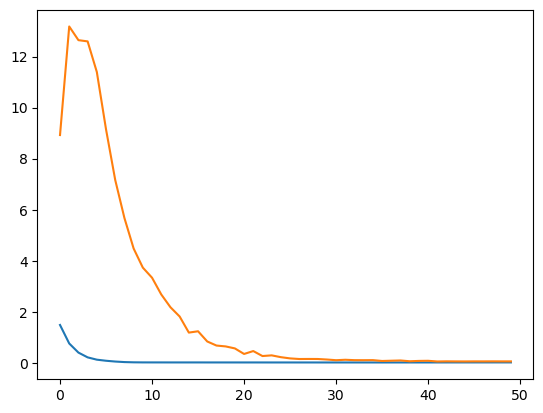

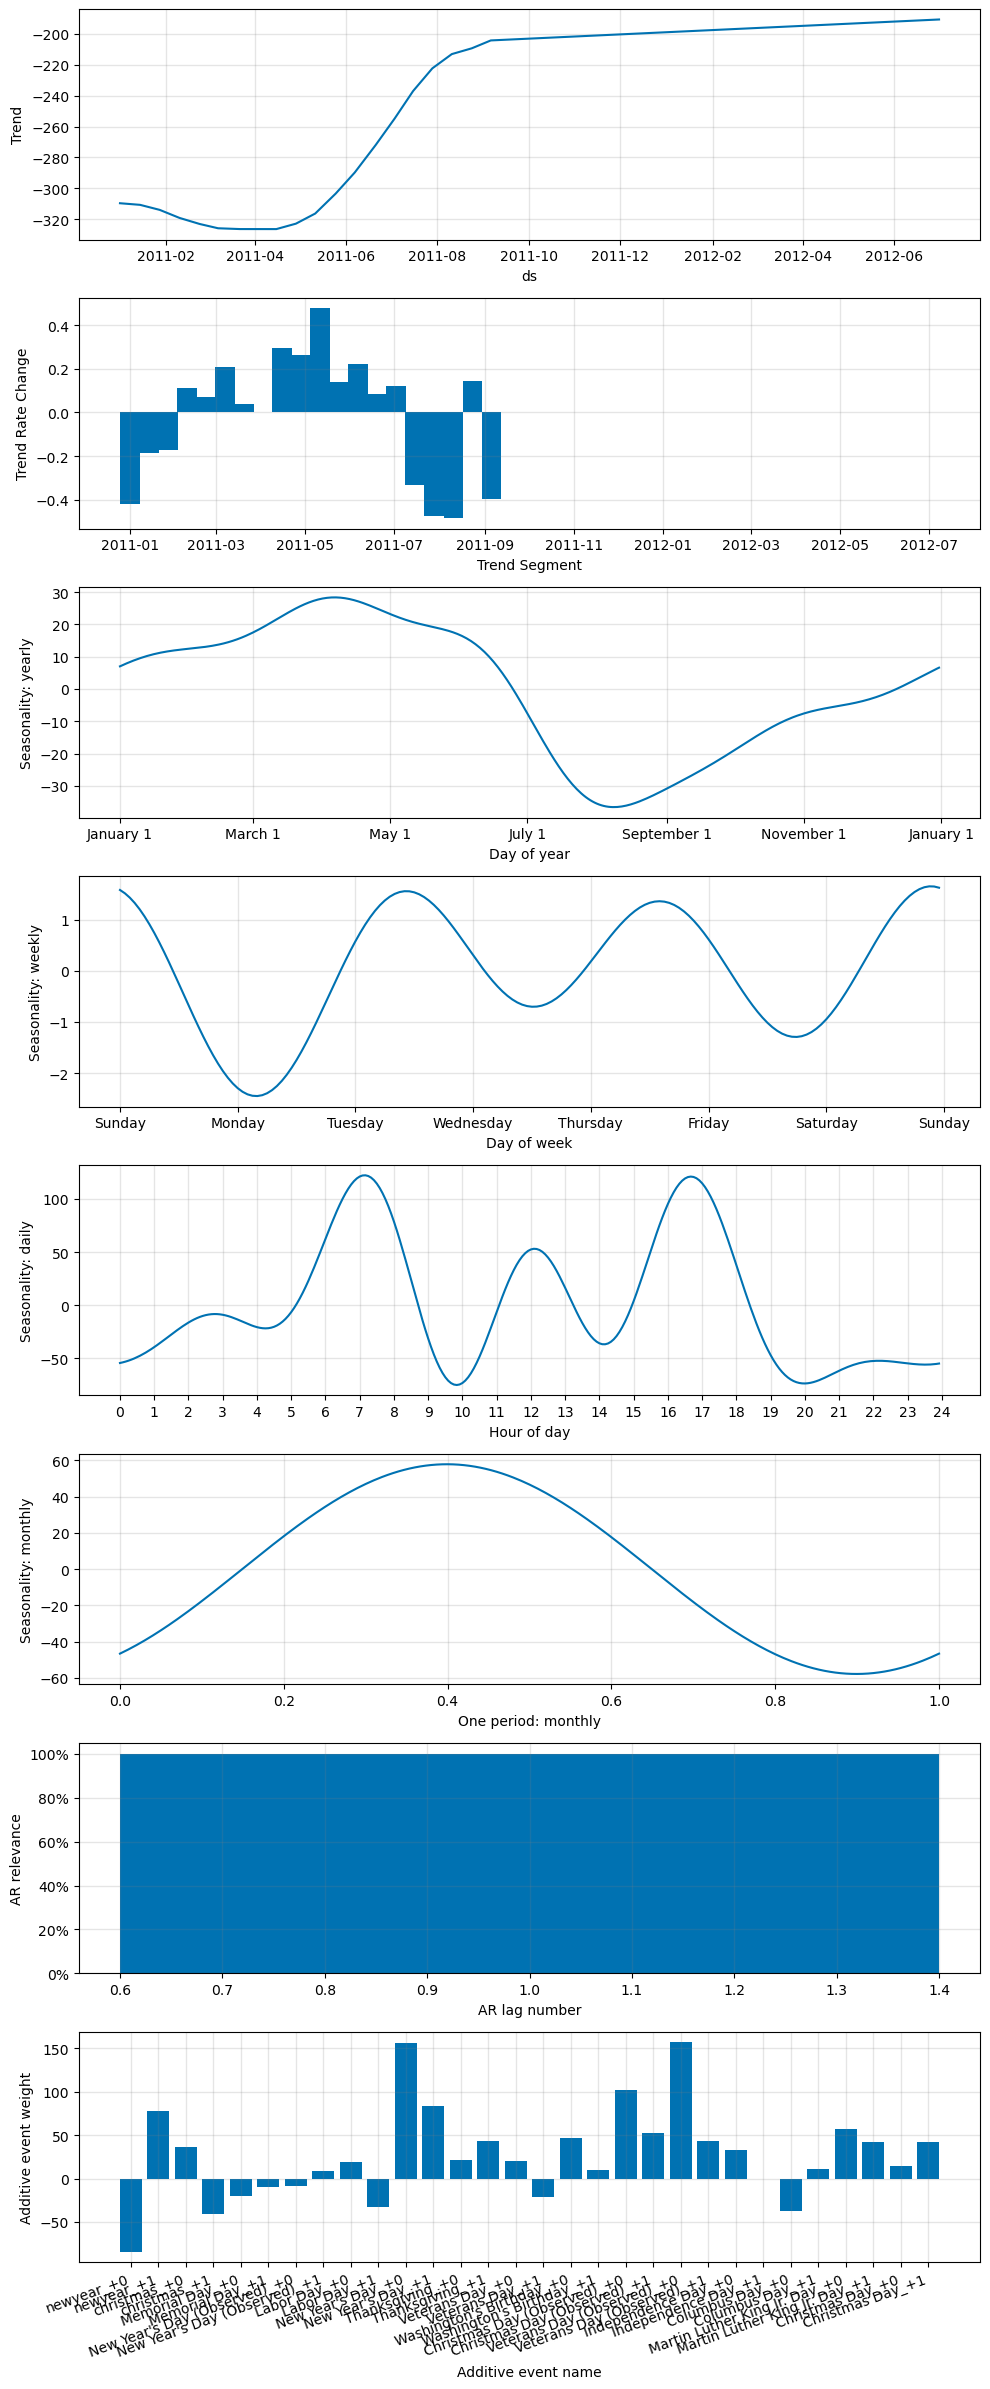

WARNING - (NP.forecaster.predict) - Raw forecasts are incompatible with plotting utilities
INFO - (NP.df_utils._infer_frequency) - Major frequency H corresponds to 99.992% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - H
INFO - (NP.df_utils._infer_frequency) - Major frequency H corresponds to 99.992% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - H


Predicting: 206it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (NP.forecaster.predict) - Raw forecasts are incompatible with plotting utilities
INFO - (NP.df_utils._infer_frequency) - Major frequency H corresponds to 99.977% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - H
INFO - (NP.df_utils._infer_frequency) - Major frequency H corresponds to 99.977% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - H


Predicting: 206it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


MAE       MSE  MAPE
Train 43.06  3,858.24  1.24
Test  86.69 12,205.52  2.09

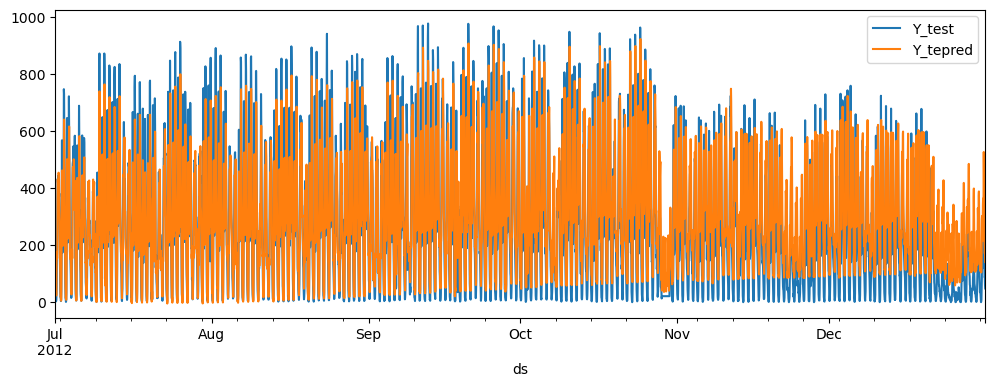

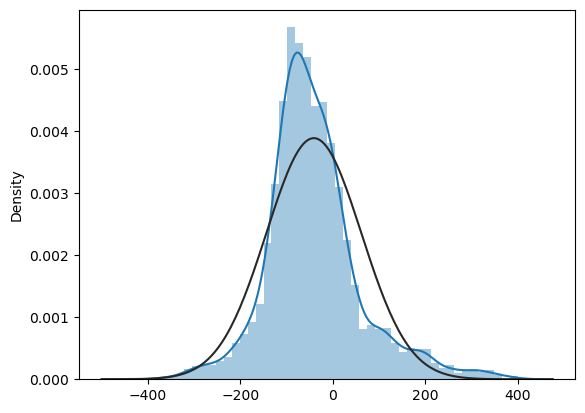

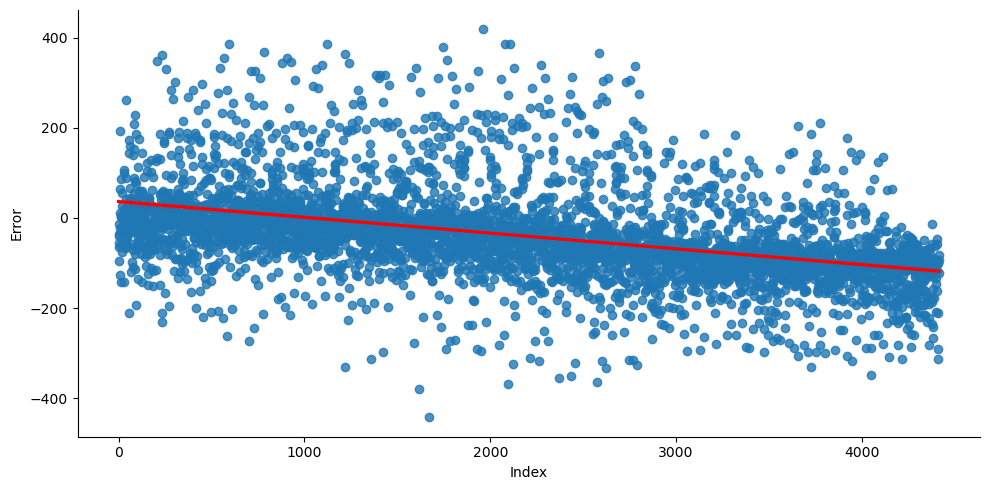

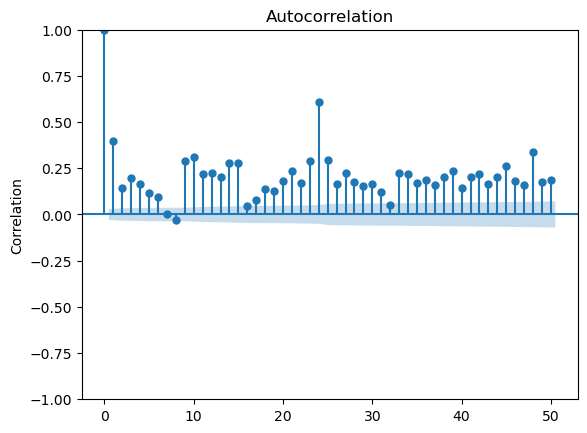

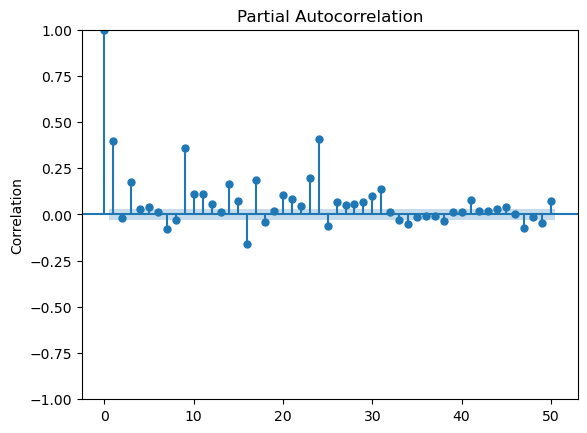

Normality Heteroscedasticity  Autocorr(lag10)  \
Test Statistics           0.95               1.15         1,980.27   
p-value                   0.00               0.00             0.00   
Alternative                NaN          two-sided              NaN   
Used Lag                   NaN                NaN              NaN   
Critical Value(1%)         NaN                NaN              NaN   
Critical Value(5%)         NaN                NaN              NaN   
Critical Value(10%)        NaN                NaN              NaN   

                     Autocorr(lag50)  Stationarity_ADF  Stationarity_KPSS  
Test Statistics            10,616.32             -1.46              13.96  
p-value                         0.00              0.55               0.01  
Alternative                      NaN               NaN                NaN  
Used Lag                         NaN             30.00              28.00  
Critical Value(1%)               NaN             -3.43               0.74  
Critical Value(5%)               NaN             -2.86               0.46  
Critical Value(10%)              NaN             -2.57               0.35

In [13]:
# NeuralProphet 데이터형식으로 변환
Y_train_neupro = Y_train.reset_index()
Y_train_neupro.columns = ['ds', 'y']
Y_test_neupro = Y_test.reset_index()
Y_test_neupro.columns = ['ds', 'y']

# 모델링
model_neupro = NeuralProphet(# Trend
                             growth='linear',    
                             changepoints=None,    
                             n_changepoints=20,    
                             changepoints_range=0.5, 
                             trend_reg=0.5,   
                             trend_reg_threshold=False,  
                             # Seasonality
                             seasonality_mode='additive',
                             seasonality_reg=1,   
                             yearly_seasonality=True,   
                             weekly_seasonality='auto', 
                             daily_seasonality='auto', 
                             #  AR-Net
                             n_lags=1,   
                             num_hidden_layers=4,   
                             d_hidden=16,    
                             ar_reg=0.5,  
                             # 설정
                             n_forecasts=1,
                             normalize='auto',   
                             learning_rate=None,
                             epochs=50,
                             batch_size=None,
                             loss_func='MSE',
                             optimizer='AdamW')
### monthly seasonality ###
model_neupro.add_seasonality(name='monthly', period=24*7*4, fourier_order=1)
###########################
### holiday ###
model_neupro.add_country_holidays(country_name='US',
                                  mode='additive', 
                                  lower_window=0, upper_window=1)
###############
### event ###
newyear = pd.DataFrame({'event': 'newyear',
                        'ds': pd.date_range('2011-01-01', periods=24, freq='H').append(pd.date_range('2012-01-01', periods=24, freq='H'))})
christmas = pd.DataFrame({'event': 'christmas',
                          'ds': pd.date_range('2011-12-25', periods=24, freq='H').append(pd.date_range('2012-12-25', periods=24, freq='H'))})
df_events = pd.concat([newyear, christmas])
model_neupro = model_neupro.add_events(list(df_events['event'].unique()), 
                                       lower_window=0, upper_window=1, 
                                       mode='additive')
Y_train_neupro = model_neupro.create_df_with_events(Y_train_neupro, df_events)
Y_test_neupro = model_neupro.create_df_with_events(Y_test_neupro, df_events)
#############
### extra feature ###
# X_colname = X_train_RSM.columns[3:4]
# for col in X_colname:
#     model_neupro.add_lagged_regressor(col)
# Y_train_neupro = pd.concat([Y_train_neupro, X_train_RSM[X_colname].reset_index().iloc[:,1:]], axis=1)
# Y_test_neupro = pd.concat([Y_test_neupro, X_test_RSM[X_colname].reset_index().iloc[:,1:]], axis=1)
#####################
model_neupro.fit(Y_train_neupro, validation_df=Y_test_neupro,
                 freq='auto', progress='plot')
model_neupro.plot_parameters()
plt.show()
Y_trpred = model_neupro.predict(Y_train_neupro, decompose=True, raw=True)
Y_trpred.set_index('ds', inplace=True)
Y_tepred = model_neupro.predict(Y_test_neupro, decompose=True, raw=True)
Y_tepred.set_index('ds', inplace=True)

# 검증
Score_neupro = evaluation_reg_trte(Y_train.iloc[1:,:], Y_trpred.iloc[:,:1], Y_test.iloc[1:,:], Y_tepred.iloc[:,:1])
display(Score_neupro)

# 결과 시각화
ax = Y_test.plot(figsize=(12,4))
pd.DataFrame(Y_tepred[['step0']]).plot(label='Time Sequence Prediction', ax=ax)
plt.legend(['Y_test', 'Y_tepred'])
plt.show()

# 에러 분석
Resid_te = Y_test.iloc[1:,:] - Y_tepred[['step0']].values
Resid_te.columns = ['Error']
Error_te = error_analysis_timeseries(X_test.iloc[1:,:], Y_tepred, Resid_te, graph_on=True)
display(Error_te)